### Algotrading - Análise de Dados

Artur Luis Fernandes de Souza, Tarsila Bessa Nogueira Assunção

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from mpl_finance import candlestick_ohlc 
import os
import numpy as np
import scipy.optimize as sco
import scipy.stats as stats
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Séries temporais

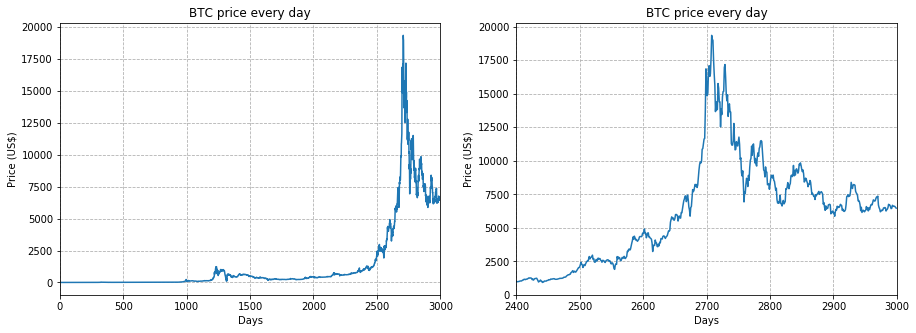

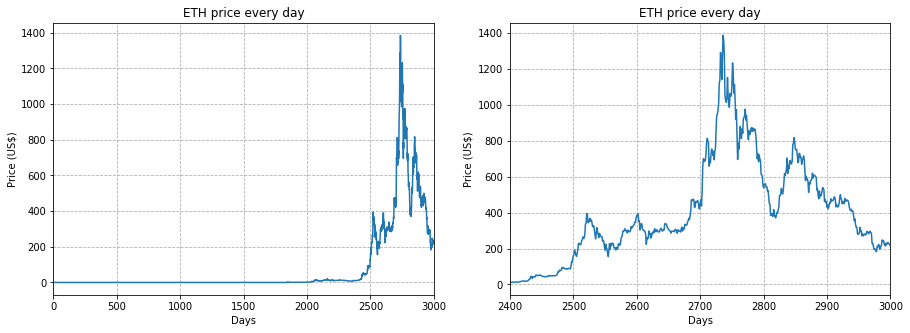

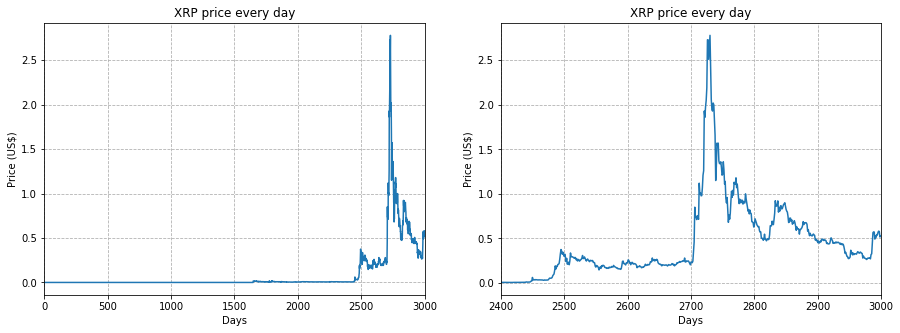

In [2]:
day_data = pd.read_csv('datasets/daily_data.csv')

def time_series_day(data, coin, start):
    data_type = 'Days'
    title = coin + ' price every day'

    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    ax = data[coin].plot()
    plt.xlim((0, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")

    data_window = data.iloc[start:, data.columns.get_loc(coin)]
    
    plt.subplot(1, 2, 2)
    ax = data_window.plot()
    plt.xlim((start, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")

    plt.show()
    
time_series_day(day_data, 'BTC', 2400)
time_series_day(day_data, 'ETH', 2400)
time_series_day(day_data, 'XRP', 2400)


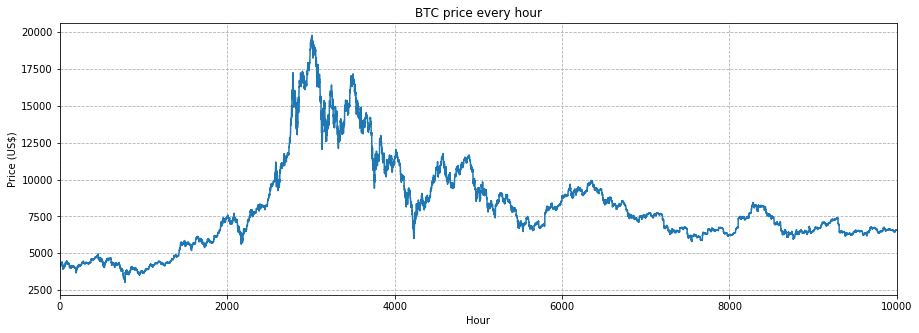

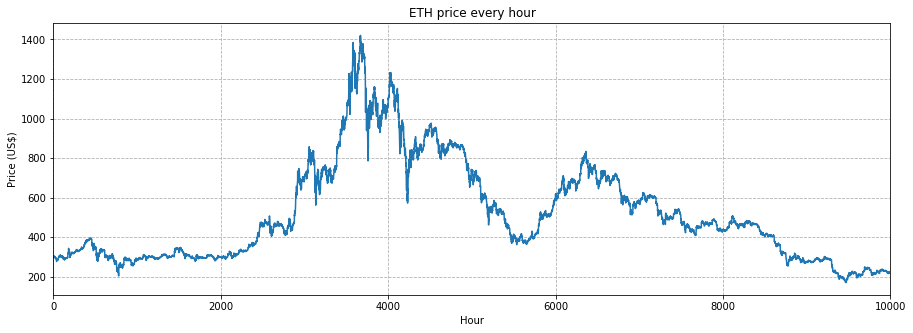

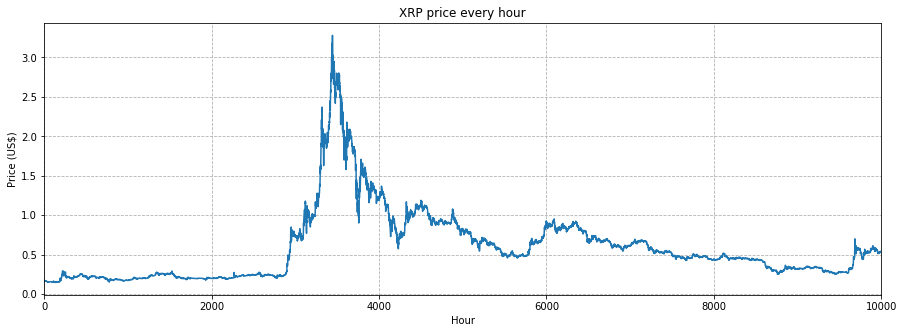

In [3]:
hour_data = pd.read_csv('datasets/hourly_data.csv')

def time_series_hour(data, coin):
    data_type = 'Hour'
    title = coin + ' price every hour'

    plt.figure(figsize=(15,5))
    ax = data[coin].plot()
    plt.xlim((0, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")
    
time_series_hour(hour_data, 'BTC')
time_series_hour(hour_data, 'ETH')
time_series_hour(hour_data, 'XRP')


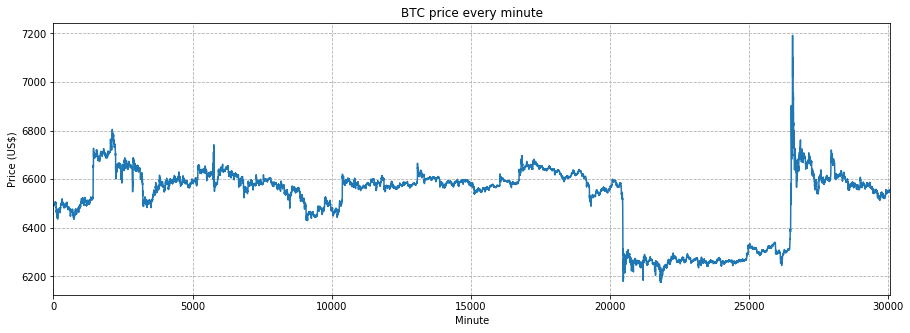

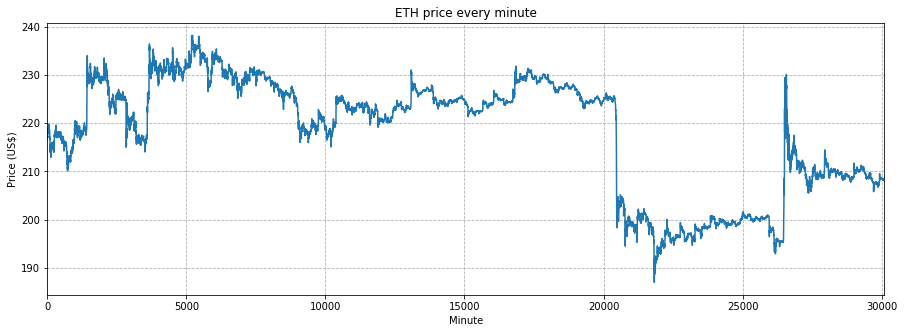

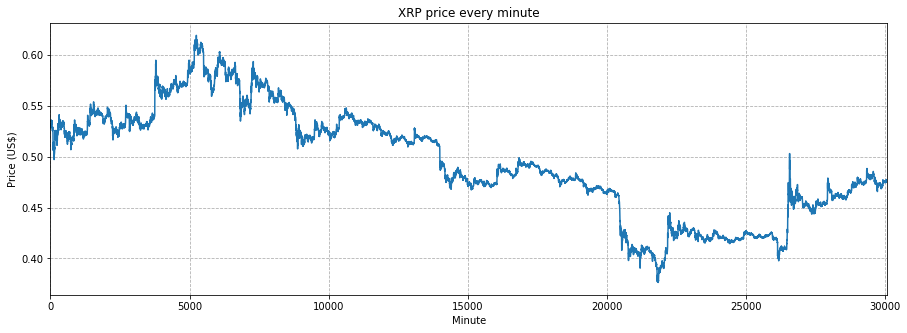

In [4]:
minute_data = pd.read_csv('datasets/minute_data.csv')

def time_series_minute(data, coin):
    data_type = 'Minute'
    title = coin + ' price every minute'

    plt.figure(figsize=(15,5))
    ax = data[coin].plot()
    plt.xlim((0, len(data)))
    plt.title(title)
    ax.set_xlabel(data_type)
    ax.set_ylabel('Price (US$)')
    plt.grid(linestyle="dashed")
    
time_series_minute(minute_data, 'BTC')
time_series_minute(minute_data, 'ETH')
time_series_minute(minute_data, 'XRP')


### Estatísticas

In [5]:
print('\nday_data:')
display(day_data[['BTC', 'ETH', 'XRP']].describe())
print('\nhour_data:')
display(hour_data[['BTC', 'ETH', 'XRP']].describe())
print('\nminute_data:')
display(minute_data[['BTC', 'ETH', 'XRP']].describe())


day_data:


,BTC,ETH,XRP
count,3000.000000,3000.000000,3000.000000
mean,1441.687534,82.007592,0.092538
std,2947.189164,203.599170,0.267200
min,0.050500,0.000000,0.000000
25%,11.665000,0.000000,0.000000
50%,289.380000,0.000000,0.000000
75%,740.560000,11.282500,0.008200
max,19345.490000,1385.020000,2.780000



hour_data:


,BTC,ETH,XRP
count,10000.000000,10000.000000,10000.000000
mean,8057.679765,517.751498,0.592293
std,3078.983493,252.437974,0.459661
min,3018.120000,170.370000,0.149200
25%,6349.232500,303.532500,0.246475
50%,7355.205000,458.910000,0.481150
75%,9206.067500,685.760000,0.750200
max,19784.930000,1420.770000,3.280000



minute_data:


,BTC,ETH,XRP
count,30088.00000,30088.000000,30088.000000
mean,6522.92012,218.165650,0.494830
std,136.43193,11.745448,0.053074
min,6175.22000,187.010000,0.376300
25%,6482.50500,209.180000,0.460600
50%,6574.24000,222.970000,0.488300
75%,6604.12000,227.160000,0.533500
max,7191.77000,238.170000,0.619600


### Distribuições

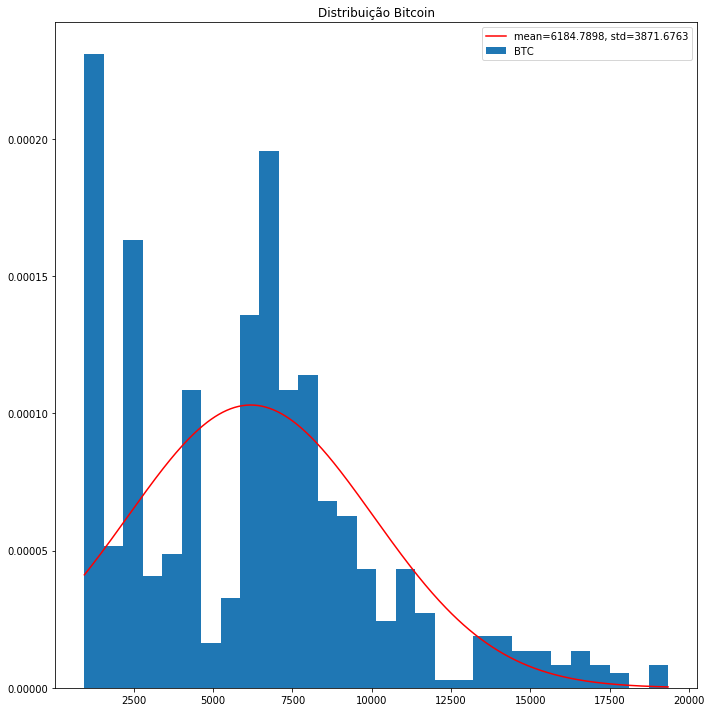

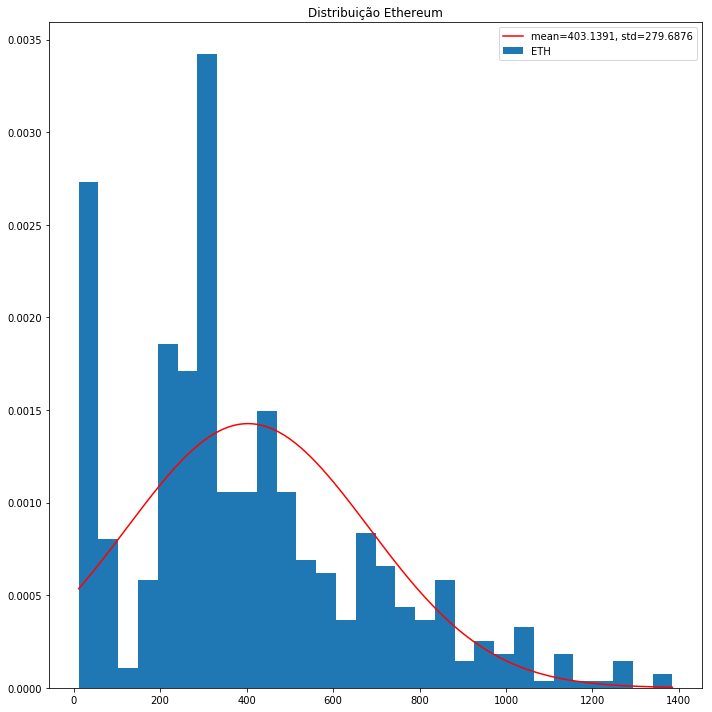

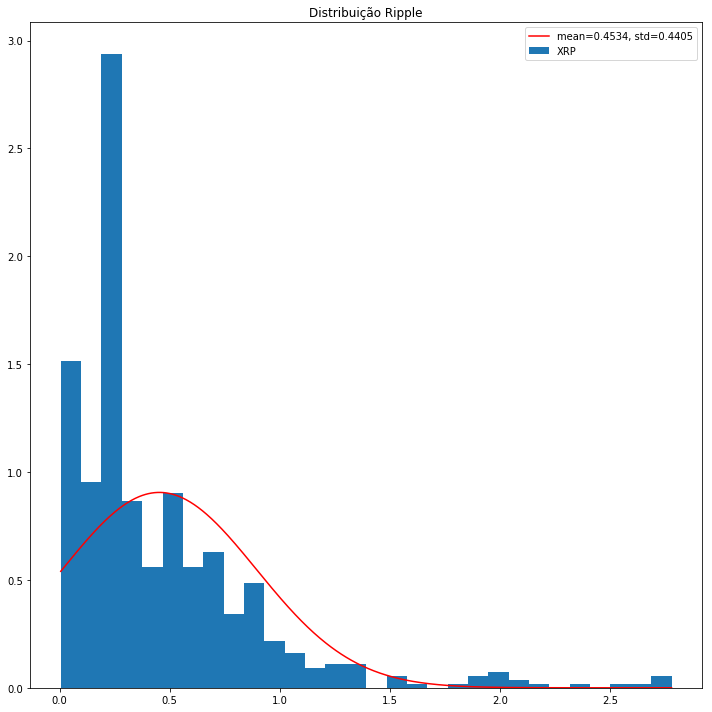

In [6]:
day_data_window = day_data.iloc[2400:]

def plot_dist(values, title):
    x = np.linspace(values.min(), values.max(), len(values))

    loc, scale = stats.norm.fit(values)
    param_density = stats.norm.pdf(x, loc=loc, scale=scale)
    label = 'mean=%.4f, std=%.4f' % (loc, scale)

    fig, ax = plt.subplots(figsize=(10, 10))
    plt.title(title)
    ax.hist(values, bins=30, normed=True)
    ax.plot(x, param_density, 'r-', label=label)
    ax.legend(loc='best')
    plt.tight_layout()

plot_dist(day_data_window['BTC'], "Distribuição Bitcoin")
plot_dist(day_data_window['ETH'], "Distribuição Ethereum")
plot_dist(day_data_window['XRP'], "Distribuição Ripple")

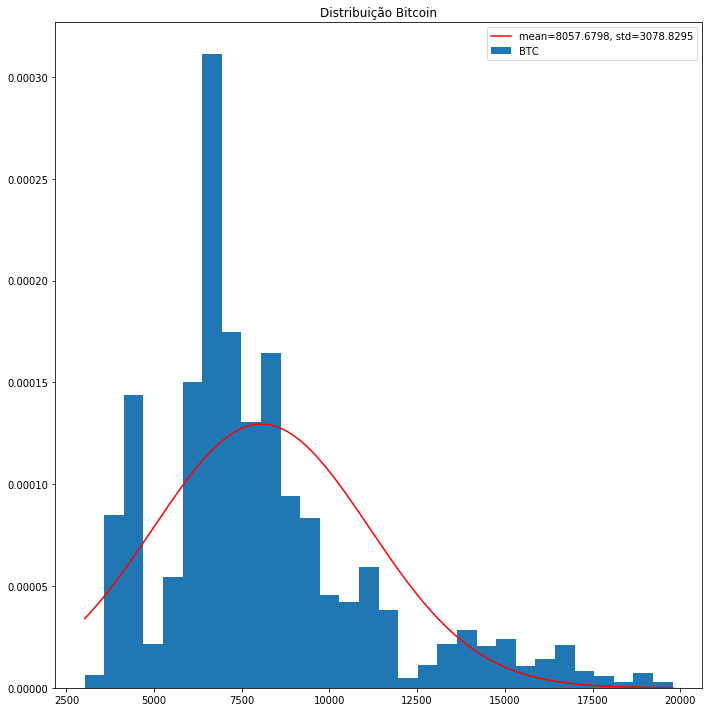

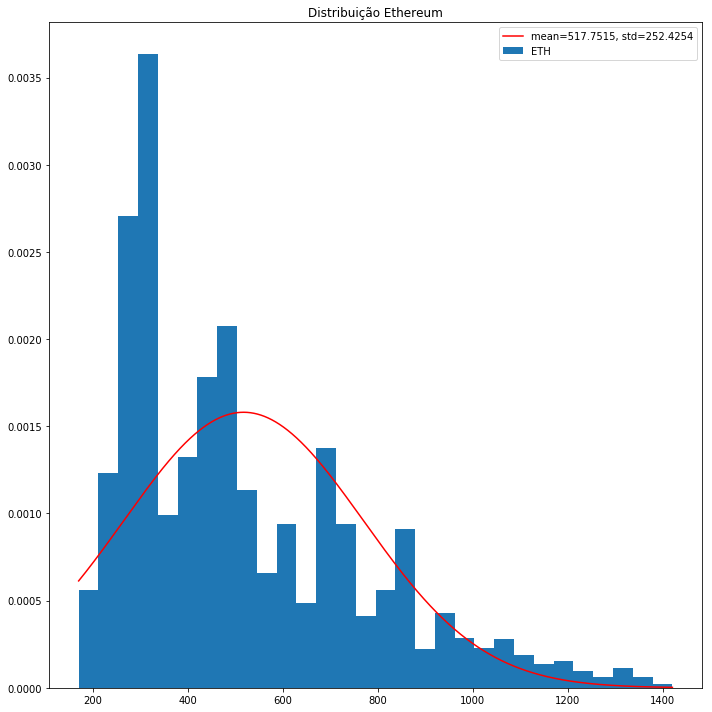

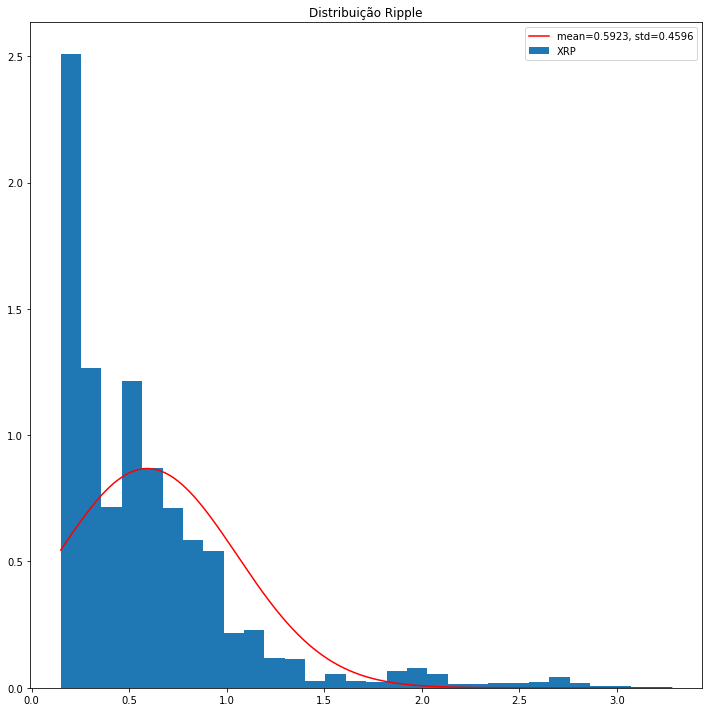

In [7]:
plot_dist(hour_data['BTC'], "Distribuição Bitcoin")
plot_dist(hour_data['ETH'], "Distribuição Ethereum")
plot_dist(hour_data['XRP'], "Distribuição Ripple")

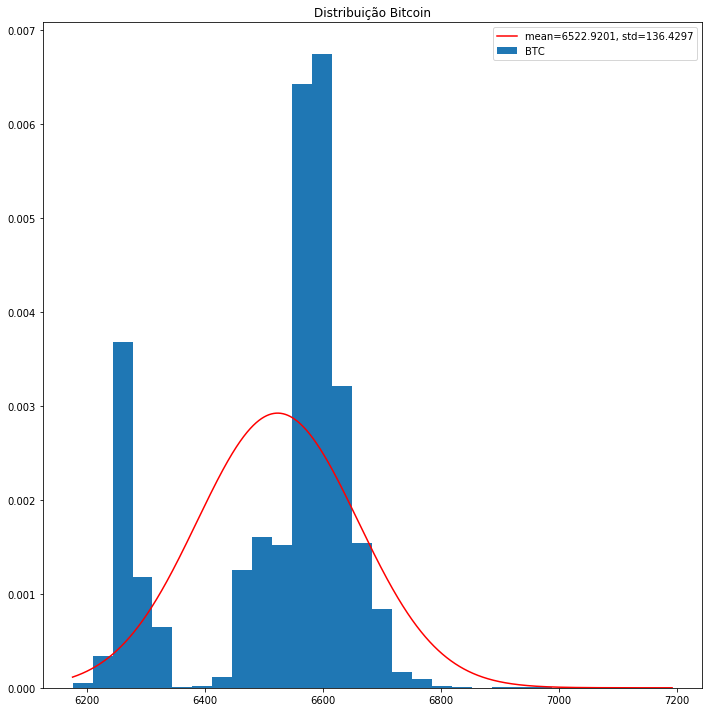

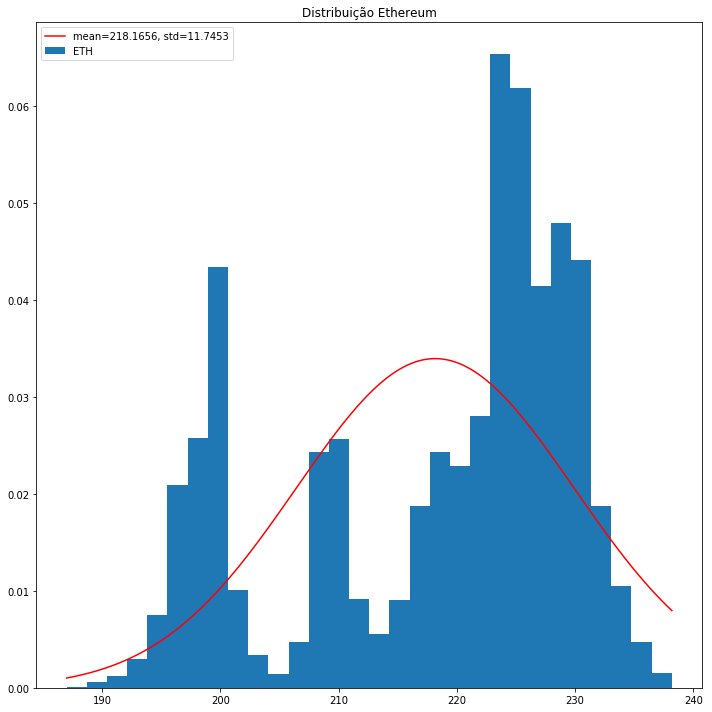

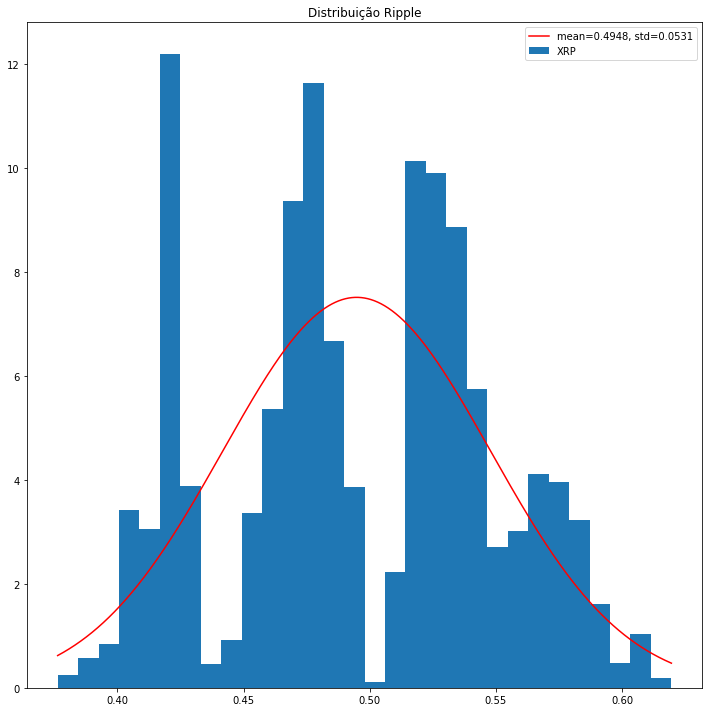

In [8]:
plot_dist(minute_data['BTC'], "Distribuição Bitcoin")
plot_dist(minute_data['ETH'], "Distribuição Ethereum")
plot_dist(minute_data['XRP'], "Distribuição Ripple")

### Mapa de calor

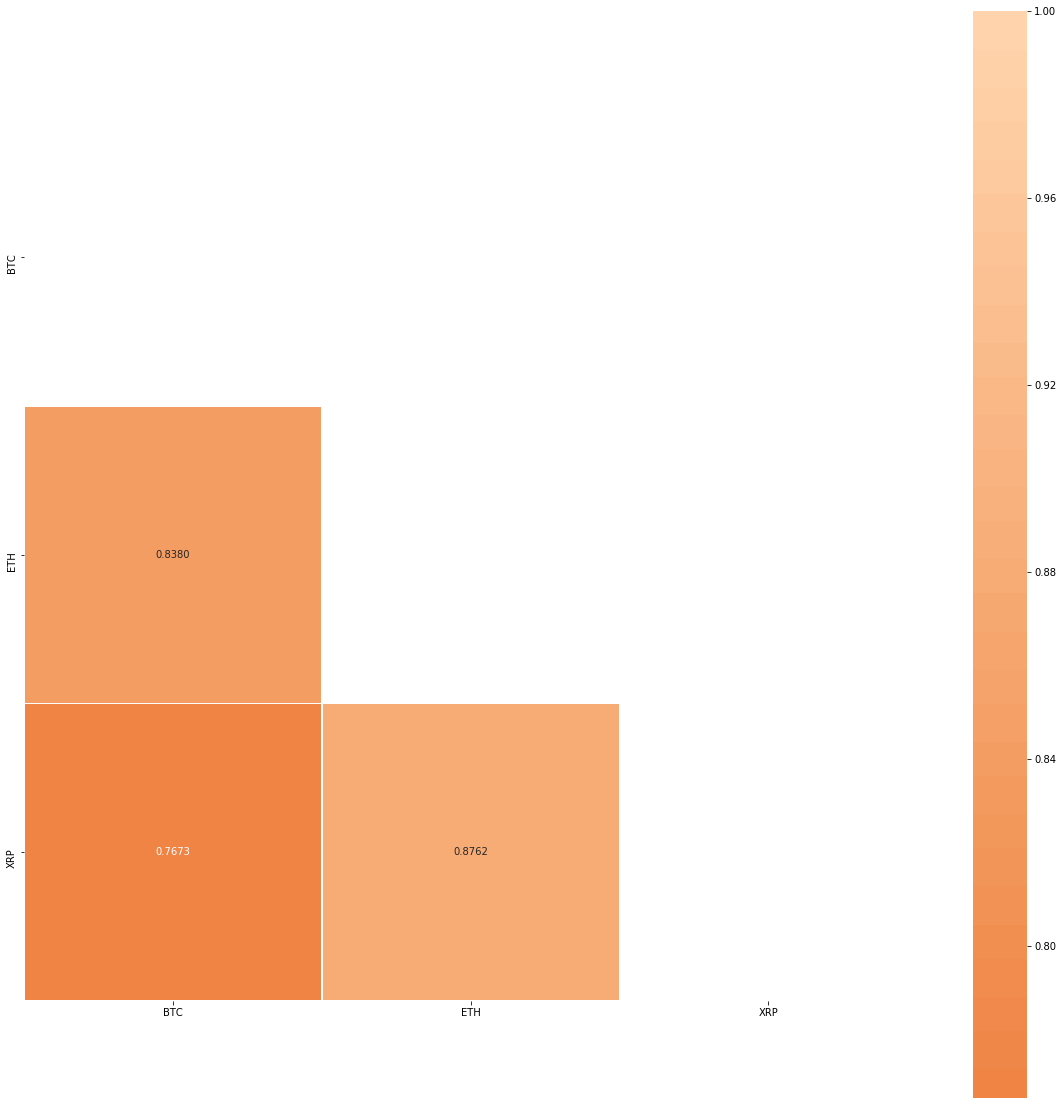

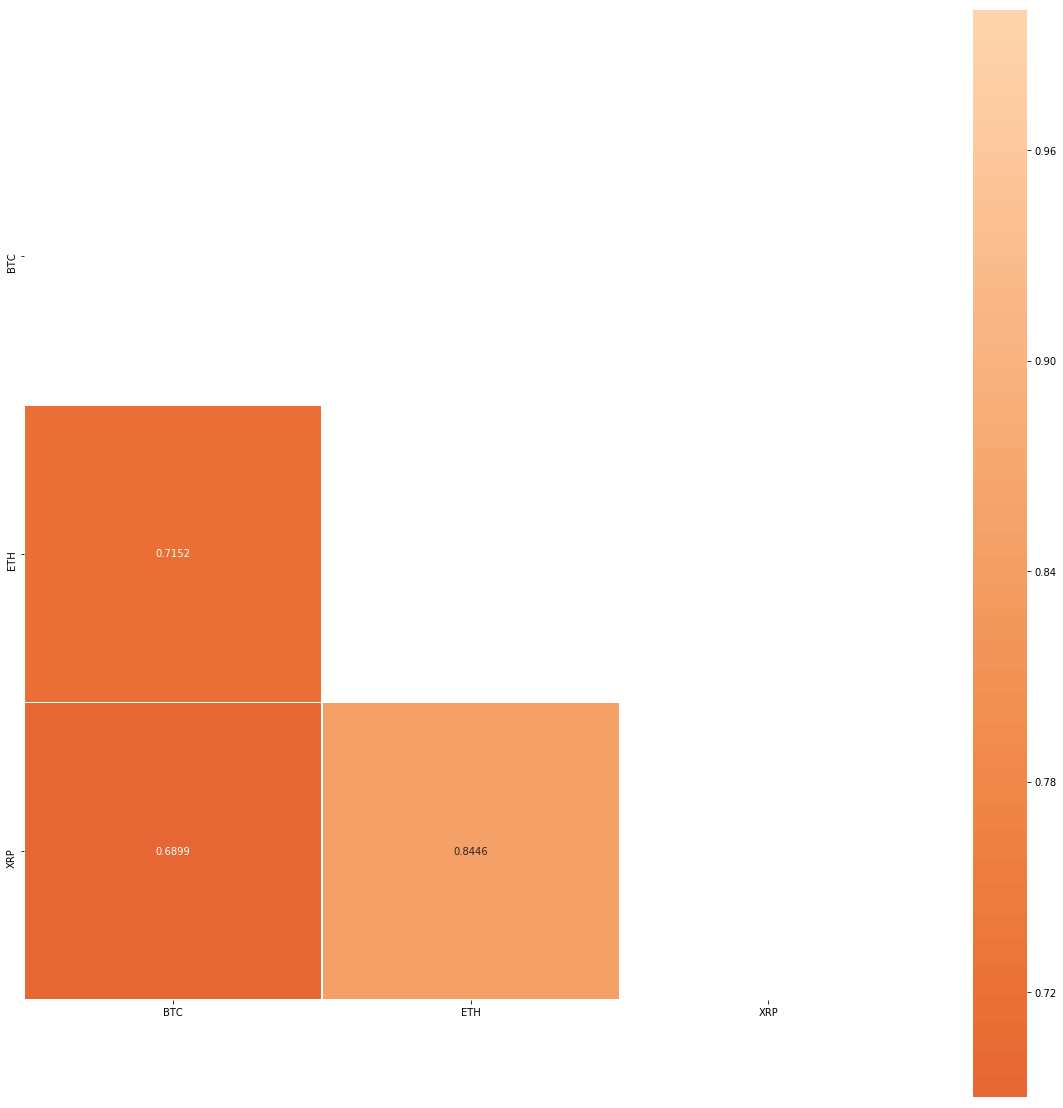

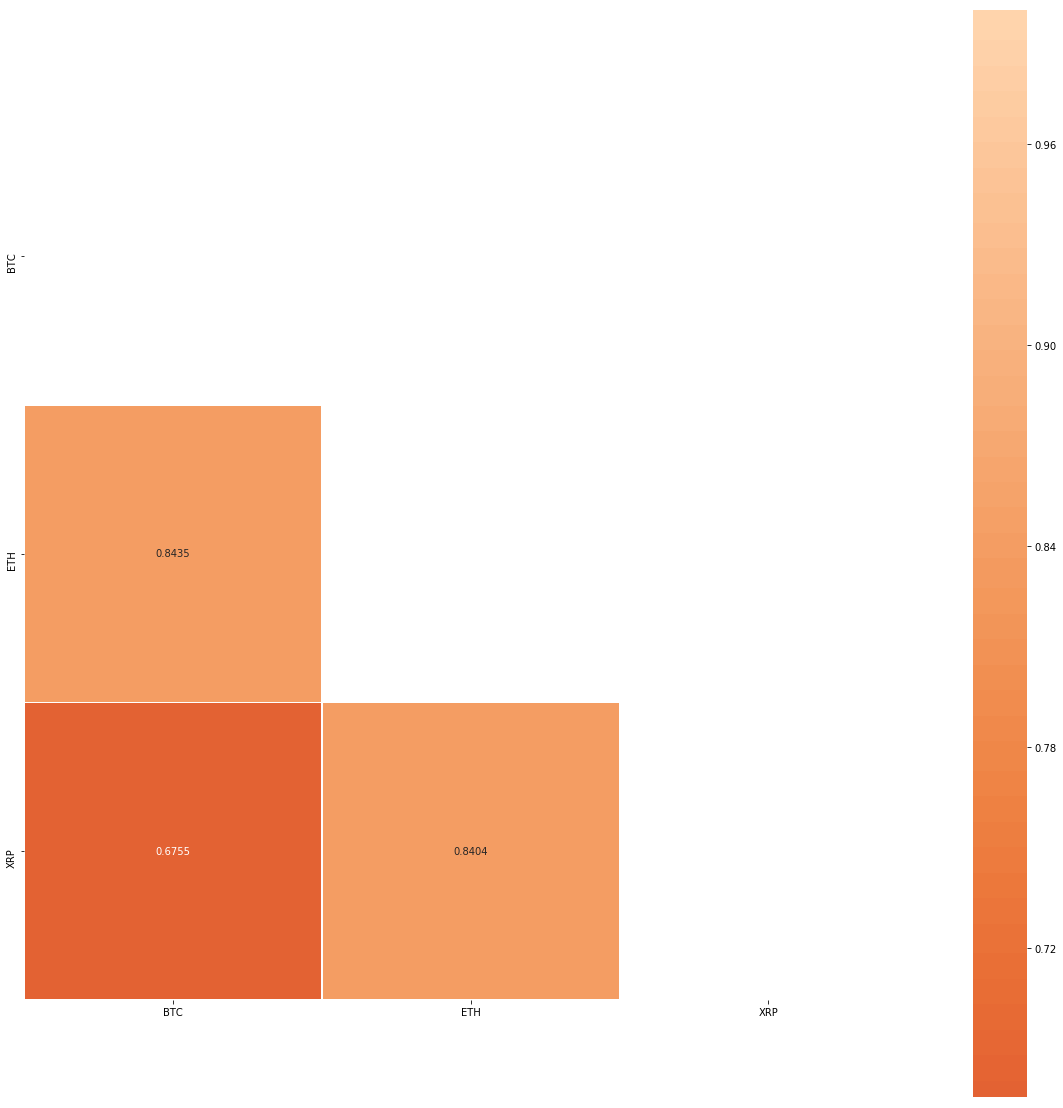

In [9]:
def heatmap(data):
    corr = pd.DataFrame()


    for symbol in ['BTC', 'ETH', 'XRP']:
        corr[f'{symbol}'] = data[symbol]

    corr = corr.corr()

    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(20, 20))

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt = '.4f', mask=mask, center=0, square=True, linewidths=.5);

heatmap(day_data_window)
heatmap(hour_data)
heatmap(minute_data)

### Gráficos violino

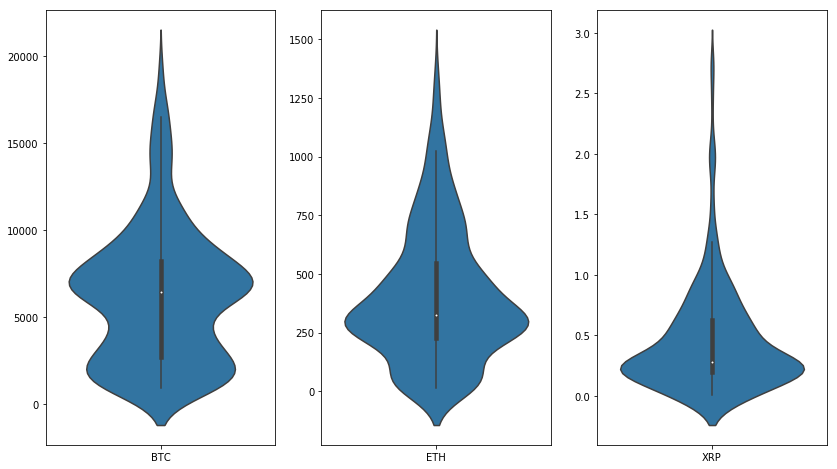

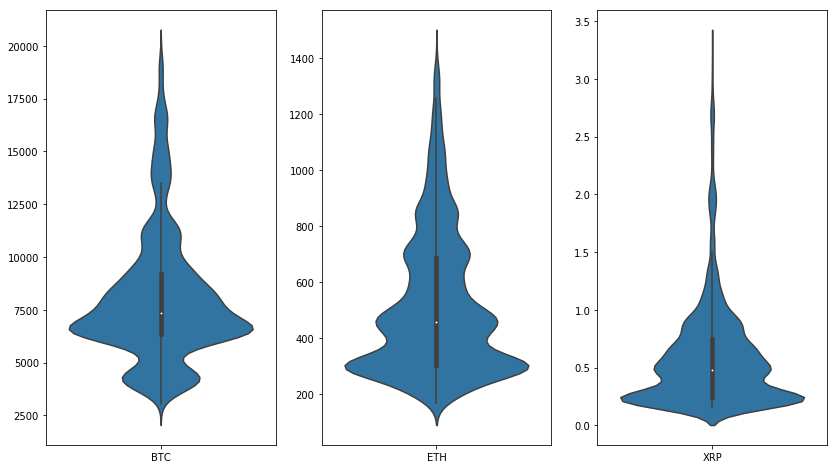

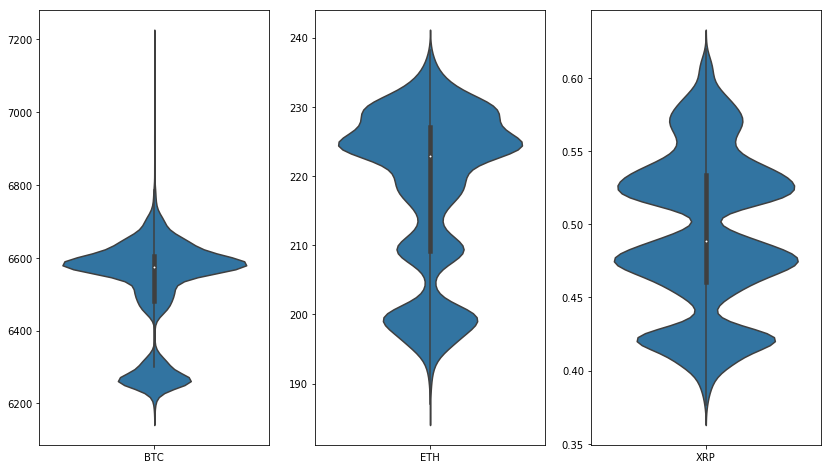

In [10]:
for data in (day_data_window.reset_index(drop=True), hour_data, minute_data):
    plt.figure(figsize=(14,8))
    plt.subplot(1, 3, 1)
    ax = sns.violinplot(data=data['BTC'])
    ax.set_xticklabels(['BTC'])
    plt.subplot(1, 3, 2)
    ax = sns.violinplot(data=data['ETH'])
    ax.set_xticklabels(['ETH'])
    plt.subplot(1, 3, 3)
    ax = sns.violinplot(data=data['XRP'])
    ax.set_xticklabels(['XRP'])


### Gráficos de densidade

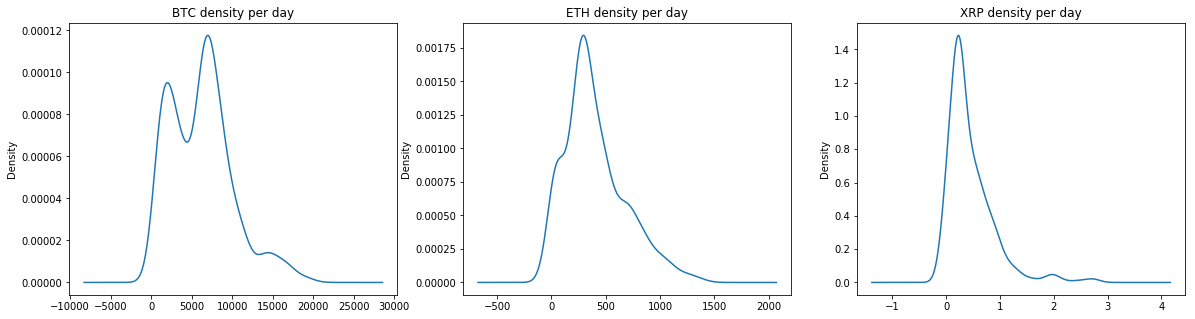

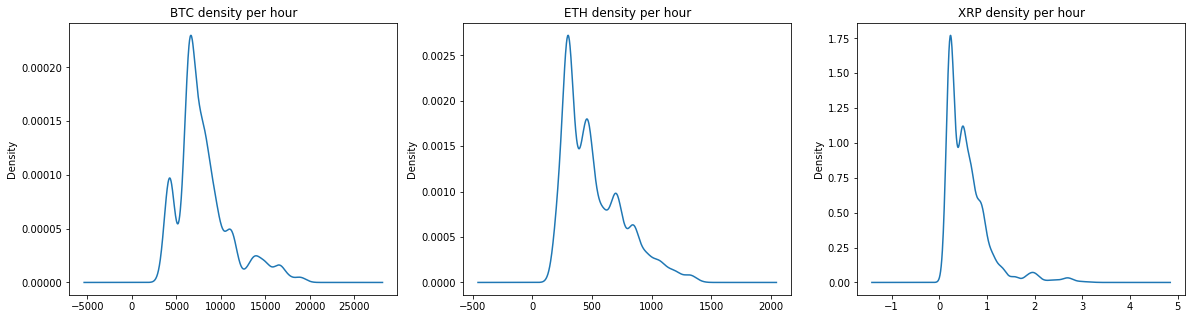

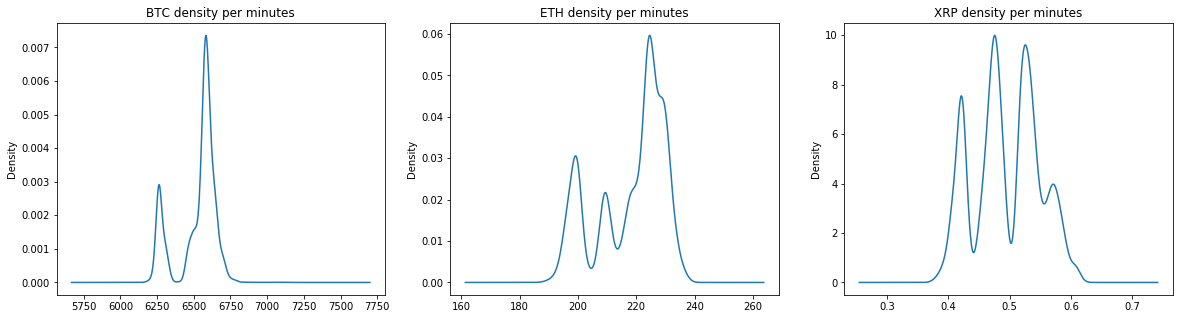

In [11]:
datasets = (day_data_window, hour_data, minute_data)
titles = ("per day", "per hour", "per minutes")

for data, title in zip(datasets, titles):
    plt.figure(figsize=(20,5))
    plt.subplot(1, 3, 1)
    plt.title('BTC density ' + title)
    data['BTC'].plot(kind='density')
    plt.subplot(1, 3, 2)
    plt.title('ETH density ' + title)
    data['ETH'].plot(kind='density')
    plt.subplot(1, 3, 3)
    plt.title('XRP density ' + title)
    data['XRP'].plot(kind='density')

### Gráficos candlestick e Heikin-Ashi

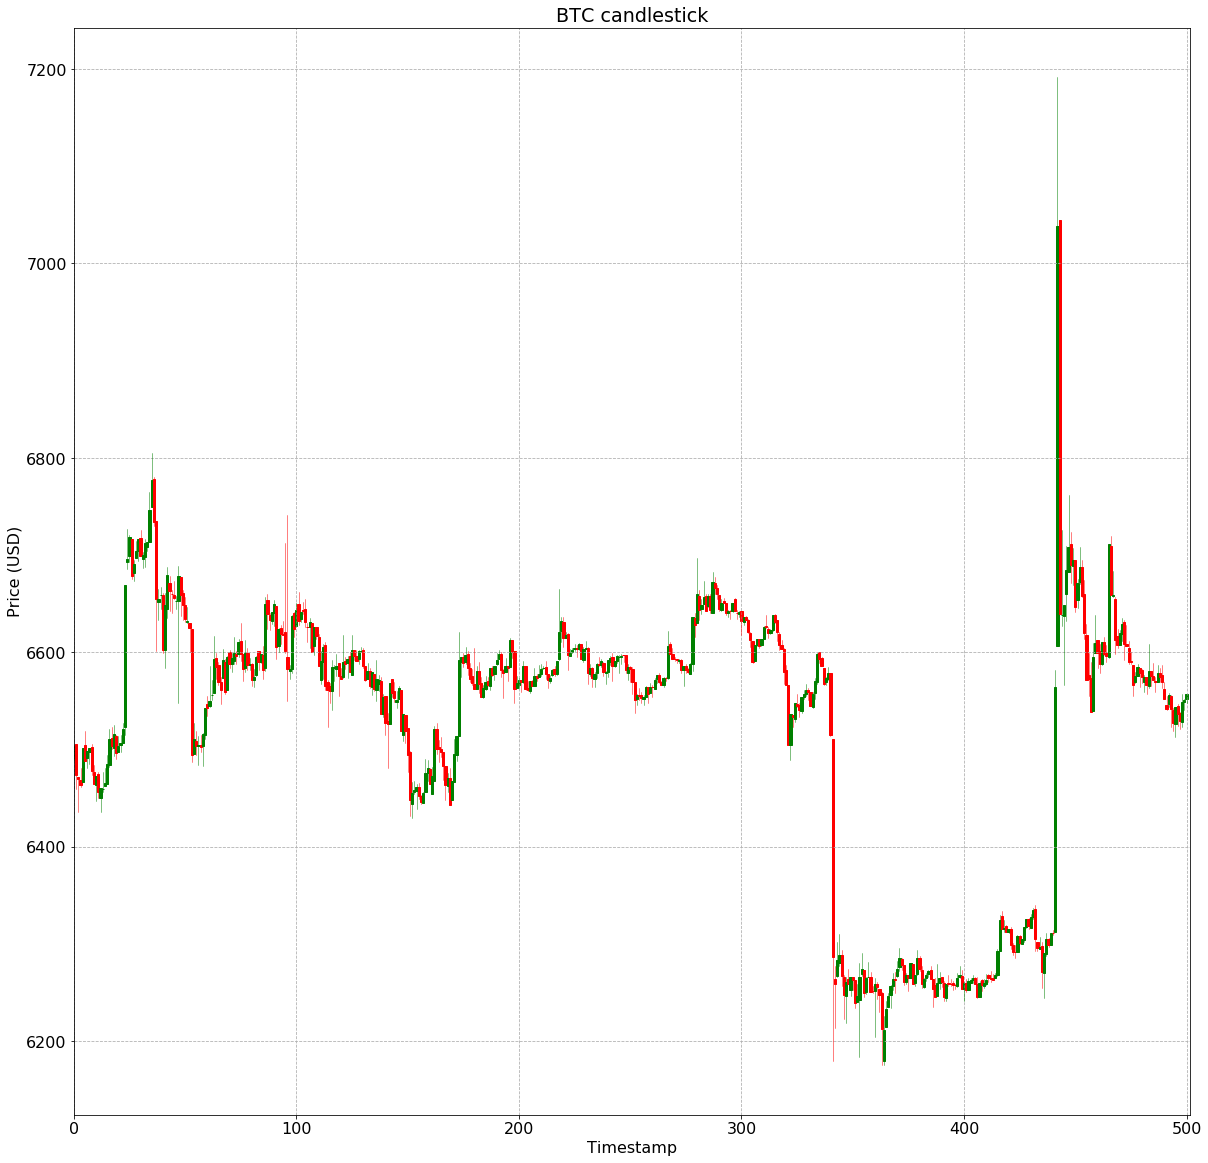

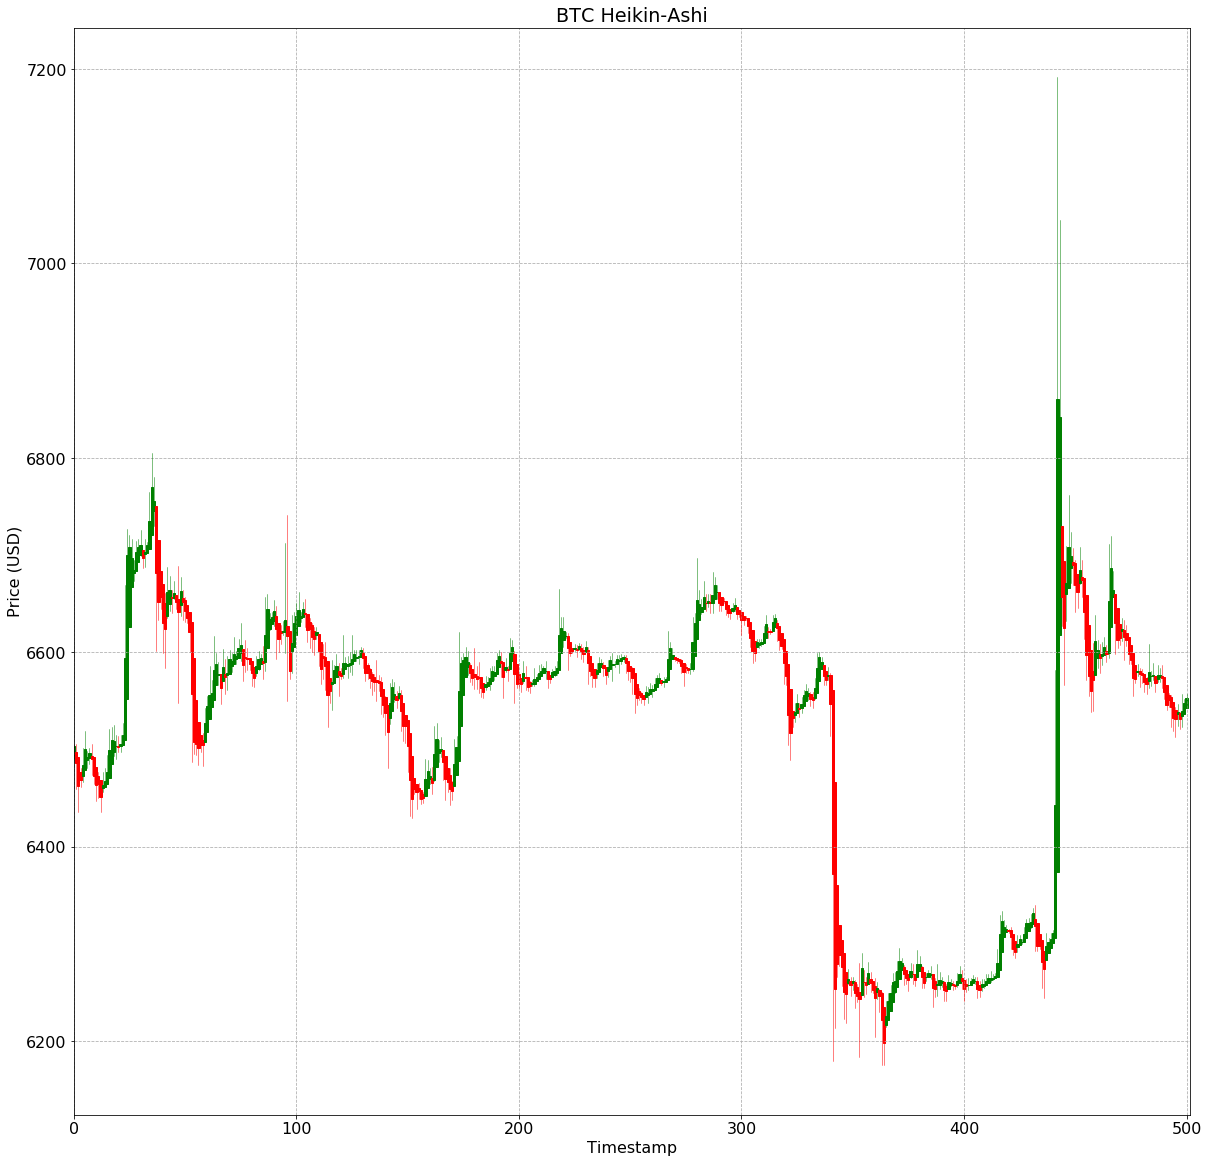

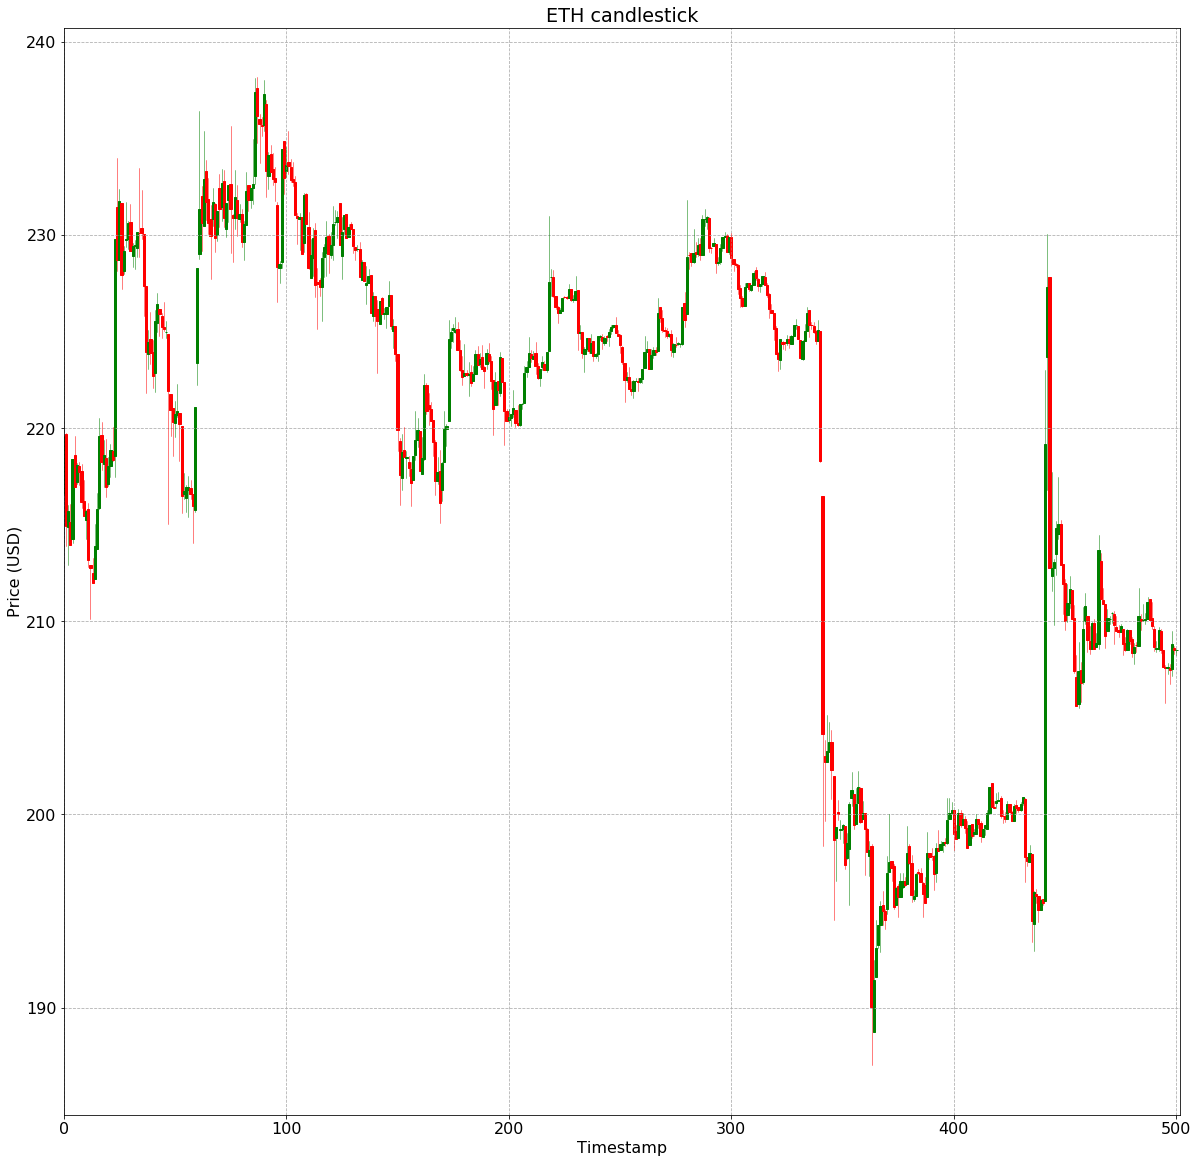

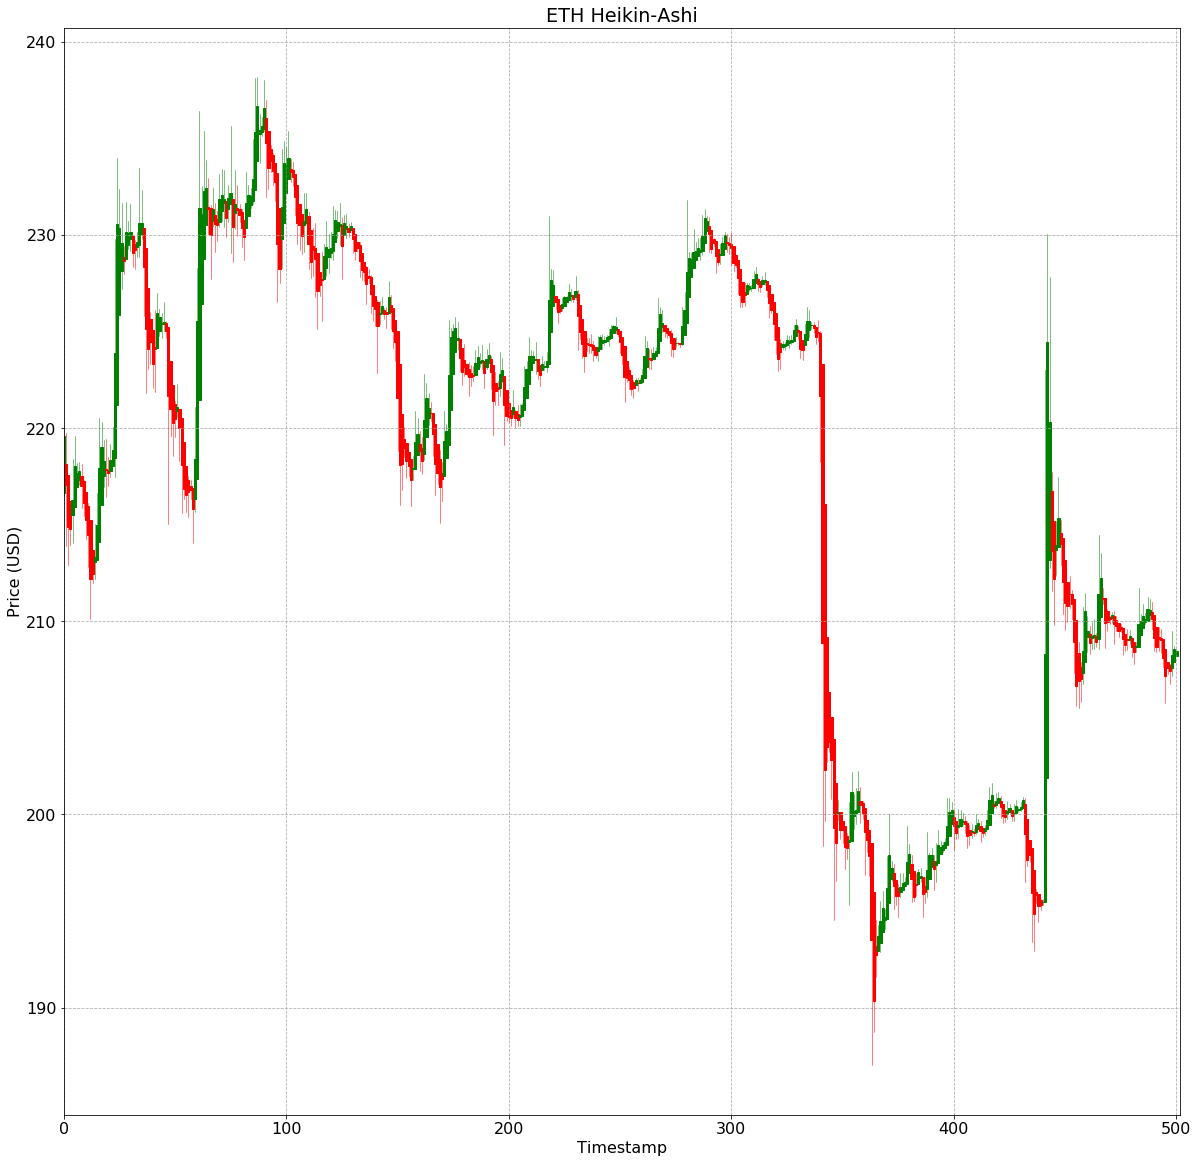

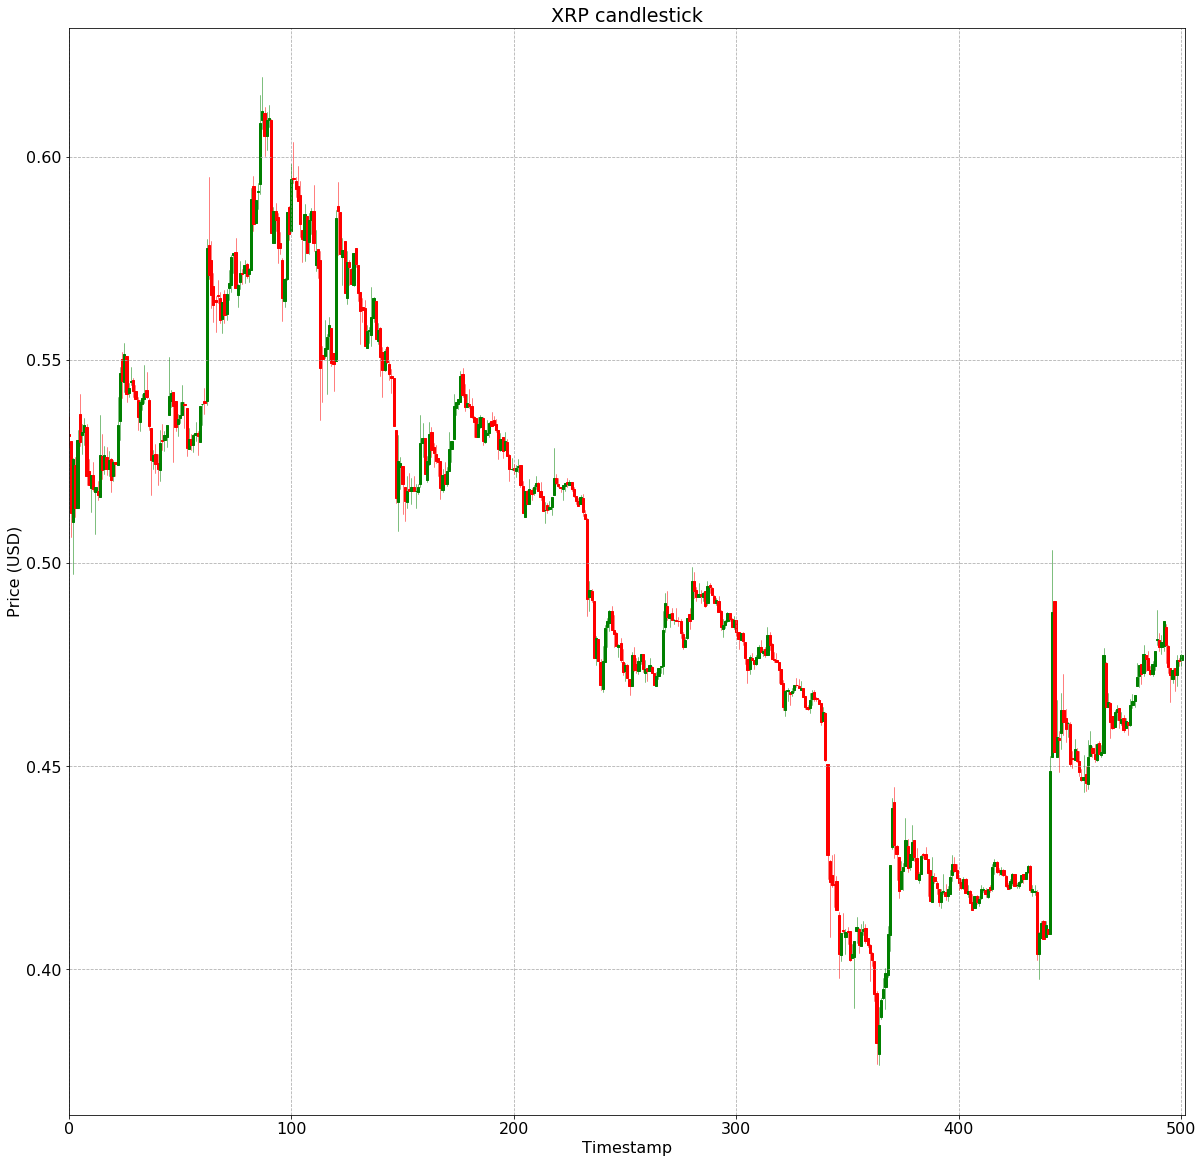

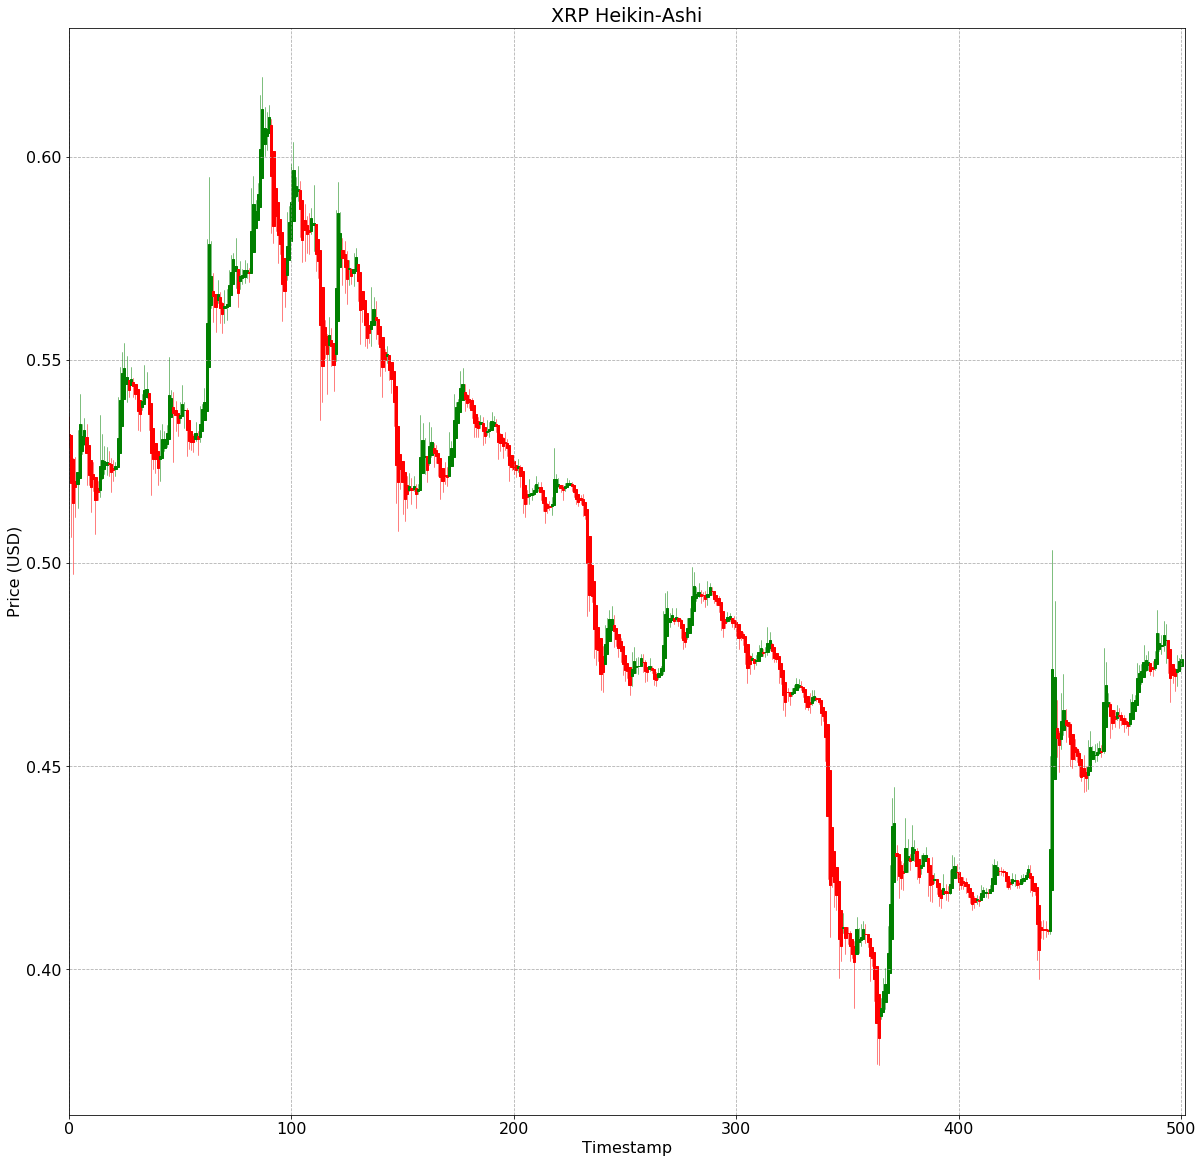

In [12]:
def candles(step, coin, dataset=minute_data): 
    date = []
    popen = []
    high = []
    low = []
    close = []
    indexes = list(range(len(dataset)))

    matplotlib.rcParams.update({'font.size': 16})
    
    for i in range(0, len(dataset) - step, step):
        date.append(dataset.at[i, coin+'_time'])
        popen.append(dataset.at[i, coin])
        high.append(max(dataset.iloc[i:i+step, minute_data.columns.get_loc(coin)]))
        low.append(min(dataset.iloc[i:i+step, minute_data.columns.get_loc(coin)]))
        close.append(dataset.at[i+step-1, coin])    

    fig, ax = plt.subplots(figsize=(20, 20))       
    candlestick_ohlc(ax, zip(indexes, popen, high, low, close), width=1, colorup='g');
    plt.title(coin + " candlestick")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Price (USD)')
    plt.xlim((0, len(indexes)/step))
    plt.grid(linestyle="dashed")

    hadate = []
    hapopen = []
    hahigh = []
    halow = []
    haclose = []    

    hadate.append(dataset.at[0, coin+'_time'])
    hapopen.append(dataset.at[0, coin])
    hahigh.append(max(dataset.iloc[0:step, minute_data.columns.get_loc(coin)]))
    halow.append(min(dataset.iloc[0:step, minute_data.columns.get_loc(coin)]))
    haclose.append(dataset.at[step-1, coin])

    for i in range(1, len(date)):
        hadate.append(date[i])
        haclose.append((popen[i] + high[i] + low[i] + close[i])/4)
        hapopen.append((hapopen[i-1] + haclose[i-1])/2)
        hahigh.append(max(high[i], haclose[i], hapopen[i]))
        halow.append(min(low[i], haclose[i], hapopen[i]))


    fig, ax = plt.subplots(figsize=(20, 20))    
    candlestick_ohlc(ax, zip(indexes, hapopen, hahigh, halow, haclose), width=1, colorup='g');
    plt.title(coin + " Heikin-Ashi")
    ax.set_xlabel('Timestamp')
    ax.set_ylabel('Price (USD)')
    plt.xlim((0, len(indexes)/step))
    plt.grid(linestyle="dashed")
    matplotlib.rcParams.update({'font.size': 12})
    
candles(60, 'BTC')
candles(60, 'ETH')
candles(60, 'XRP')

### Dados em escala logarítmica


Day data:


,BTC,BTC_time,ETH,ETH_time,XRP,XRP_time
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,4.835283,21.064710,-inf,21.064710,-inf,21.064710
std,3.020019,0.053220,NaN,0.053220,NaN,0.053220
min,-2.985782,20.969666,-inf,20.969666,-inf,20.969666
25%,2.456593,21.019057,-inf,21.019057,-inf,21.019057
50%,5.667738,21.066123,-inf,21.066123,-inf,21.066123
75%,6.607407,21.111074,2.423253,21.111074,-4.803621,21.111074
max,9.870215,21.154090,7.233470,21.154090,1.022451,21.154090



Hour data:


,BTC,BTC_time,ETH,ETH_time,XRP,XRP_time
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,8.928913,21.142392,6.139466,21.142392,-0.756764,21.142392
std,0.357229,0.006835,0.464884,0.006835,0.666061,0.006835
min,8.012389,21.130509,5.137973,21.130509,-1.902468,21.130509
25%,8.756089,21.136479,5.715489,21.136479,-1.400495,21.136479
50%,8.903164,21.142415,6.128854,21.142415,-0.731576,21.142415
75%,9.127618,21.148315,6.530528,21.148315,-0.287415,21.148315
max,9.892676,21.154181,7.258954,21.154181,1.187843,21.154181



Minute data:


,BTC,BTC_time,ETH,ETH_time,XRP,XRP_time
count,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000,30088.000000
mean,8.782856,21.154330,5.383765,21.154330,-0.709375,21.154330
std,0.021133,0.000339,0.054955,0.000339,0.108476,0.000339
min,8.728300,21.153744,5.231162,21.153744,-0.977369,21.153744
25%,8.776862,21.154037,5.343195,21.154037,-0.775225,21.154037
50%,8.790914,21.154330,5.407037,21.154330,-0.716825,21.154330
75%,8.795449,21.154623,5.425655,21.154623,-0.628296,21.154623
max,8.880693,21.154917,5.472985,21.154917,-0.478681,21.154917


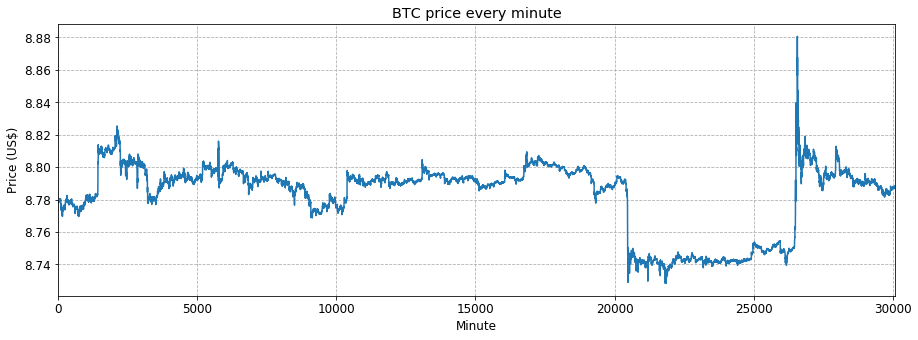

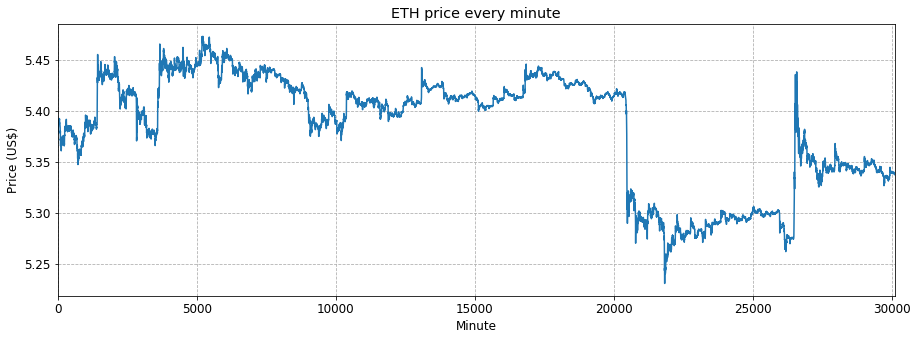

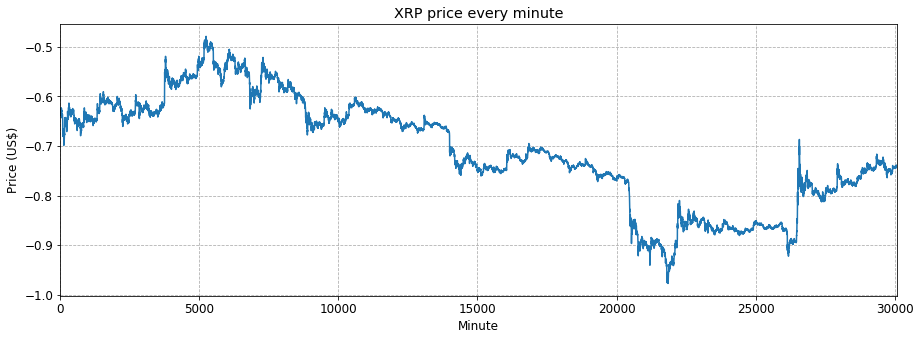

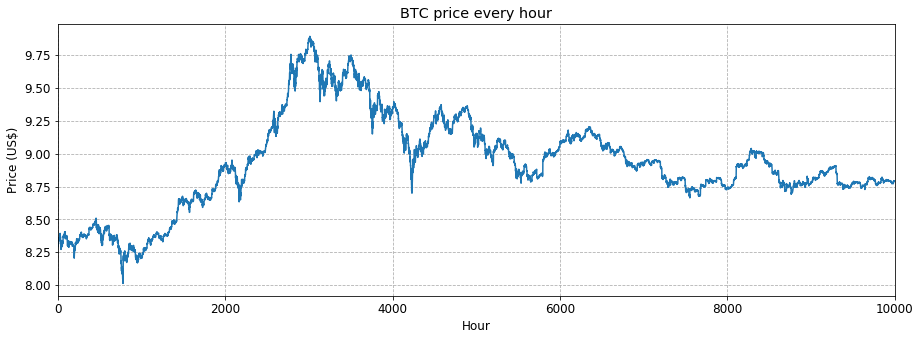

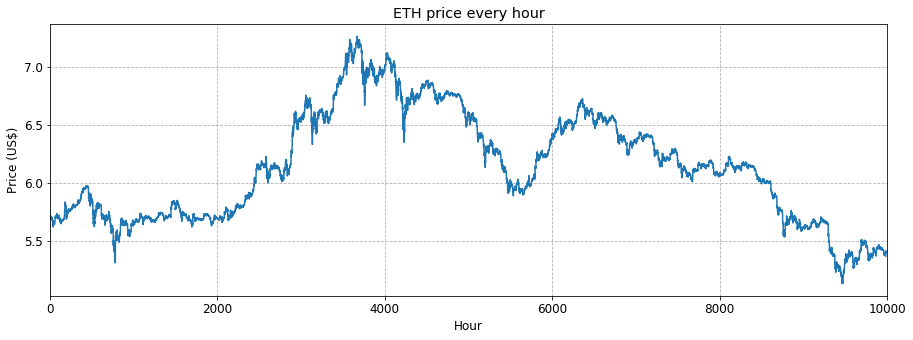

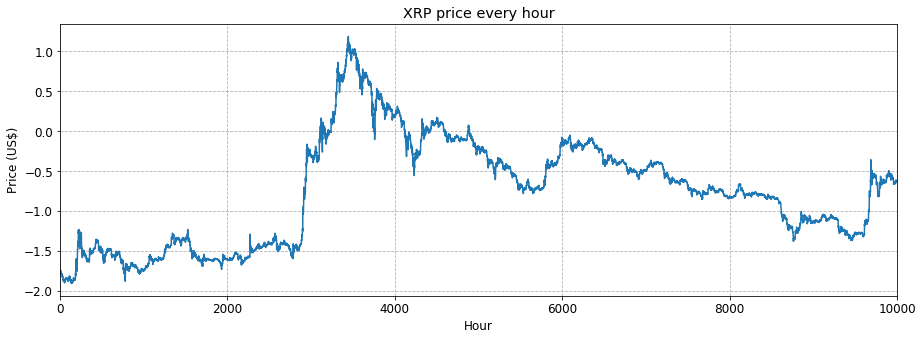

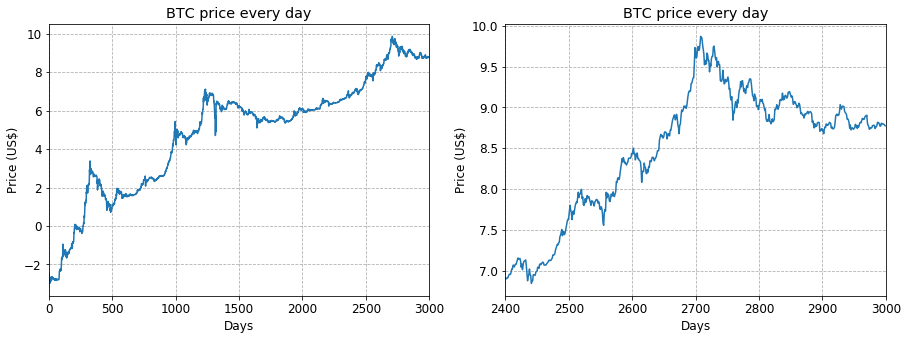

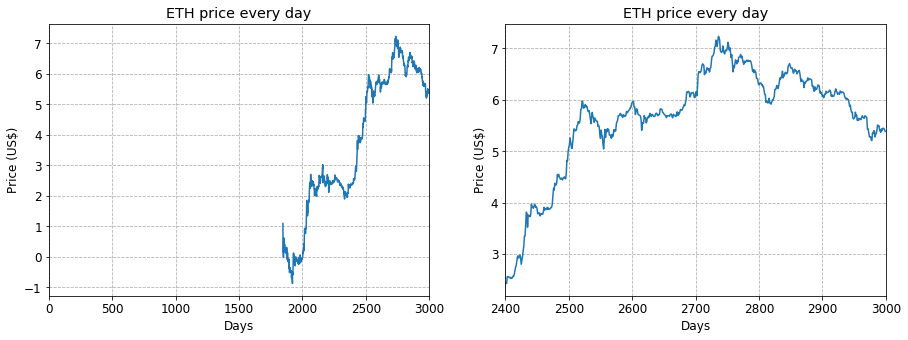

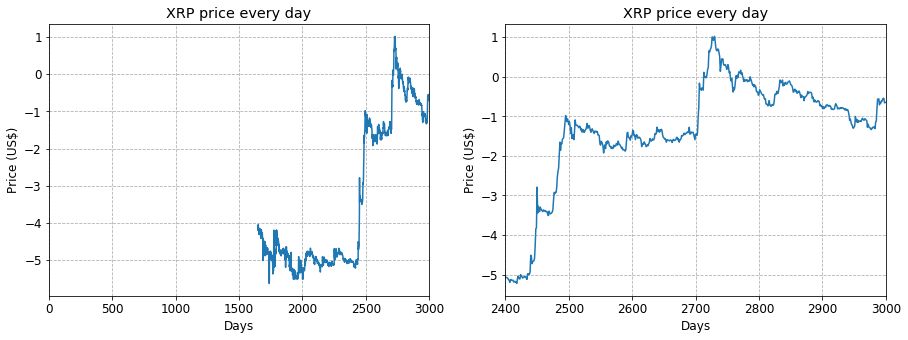

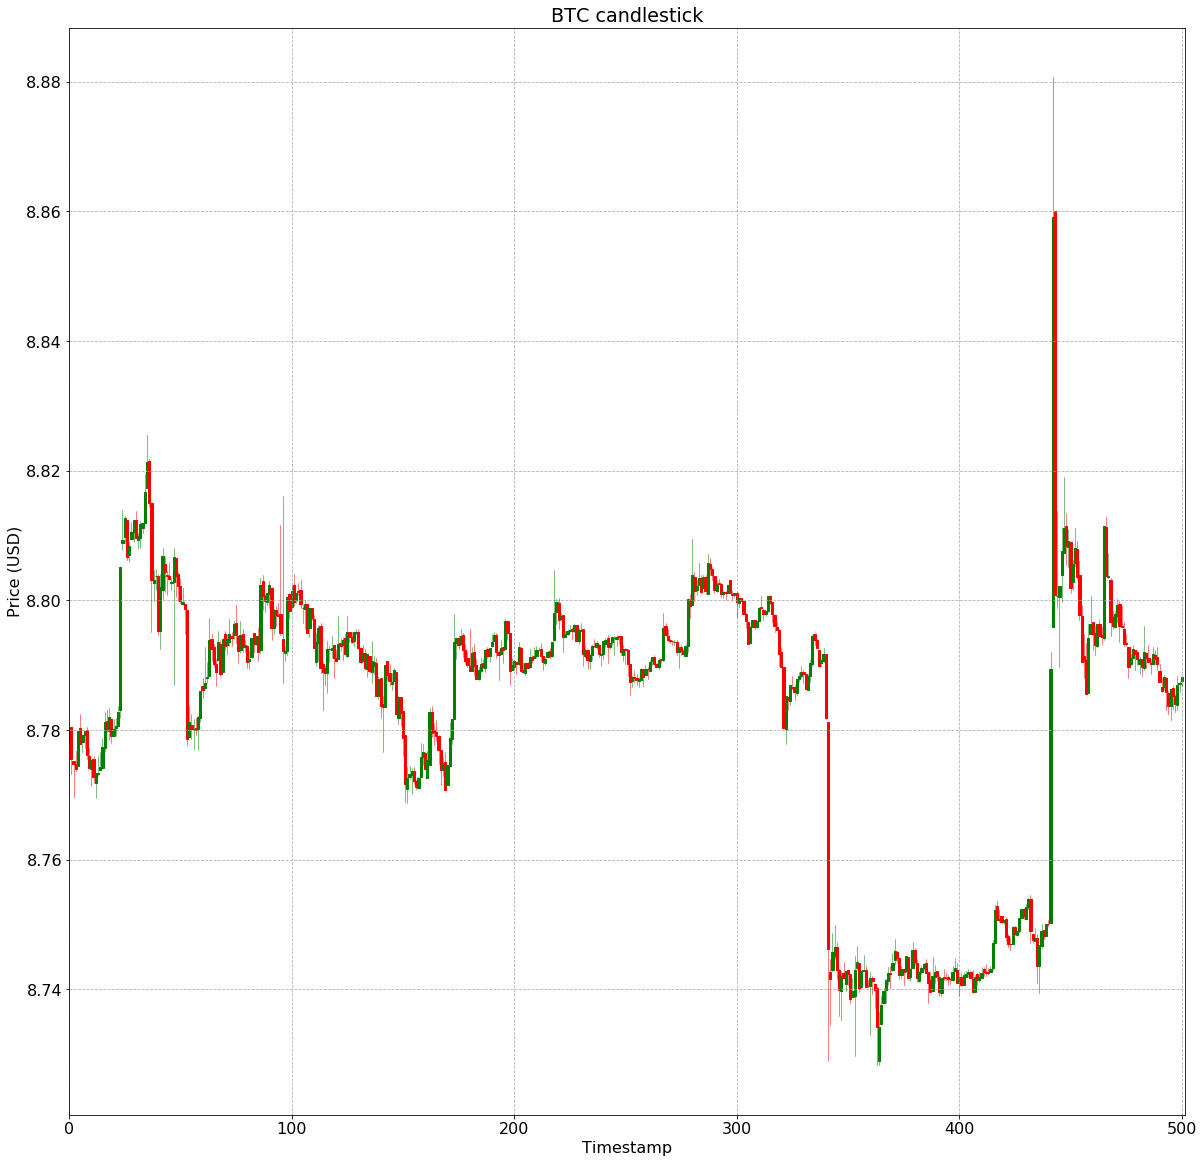

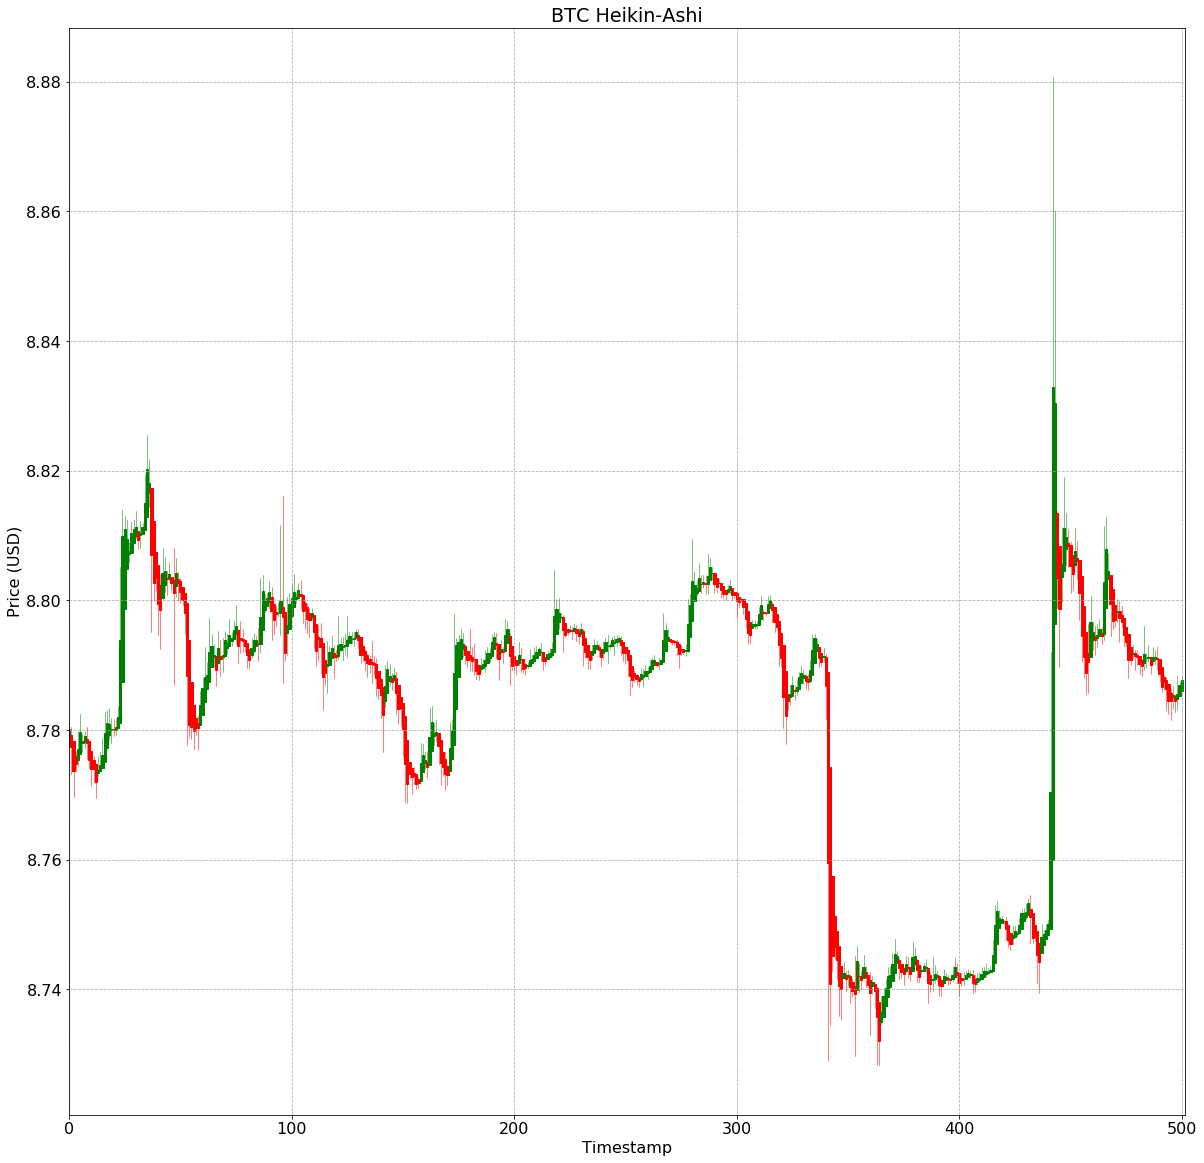

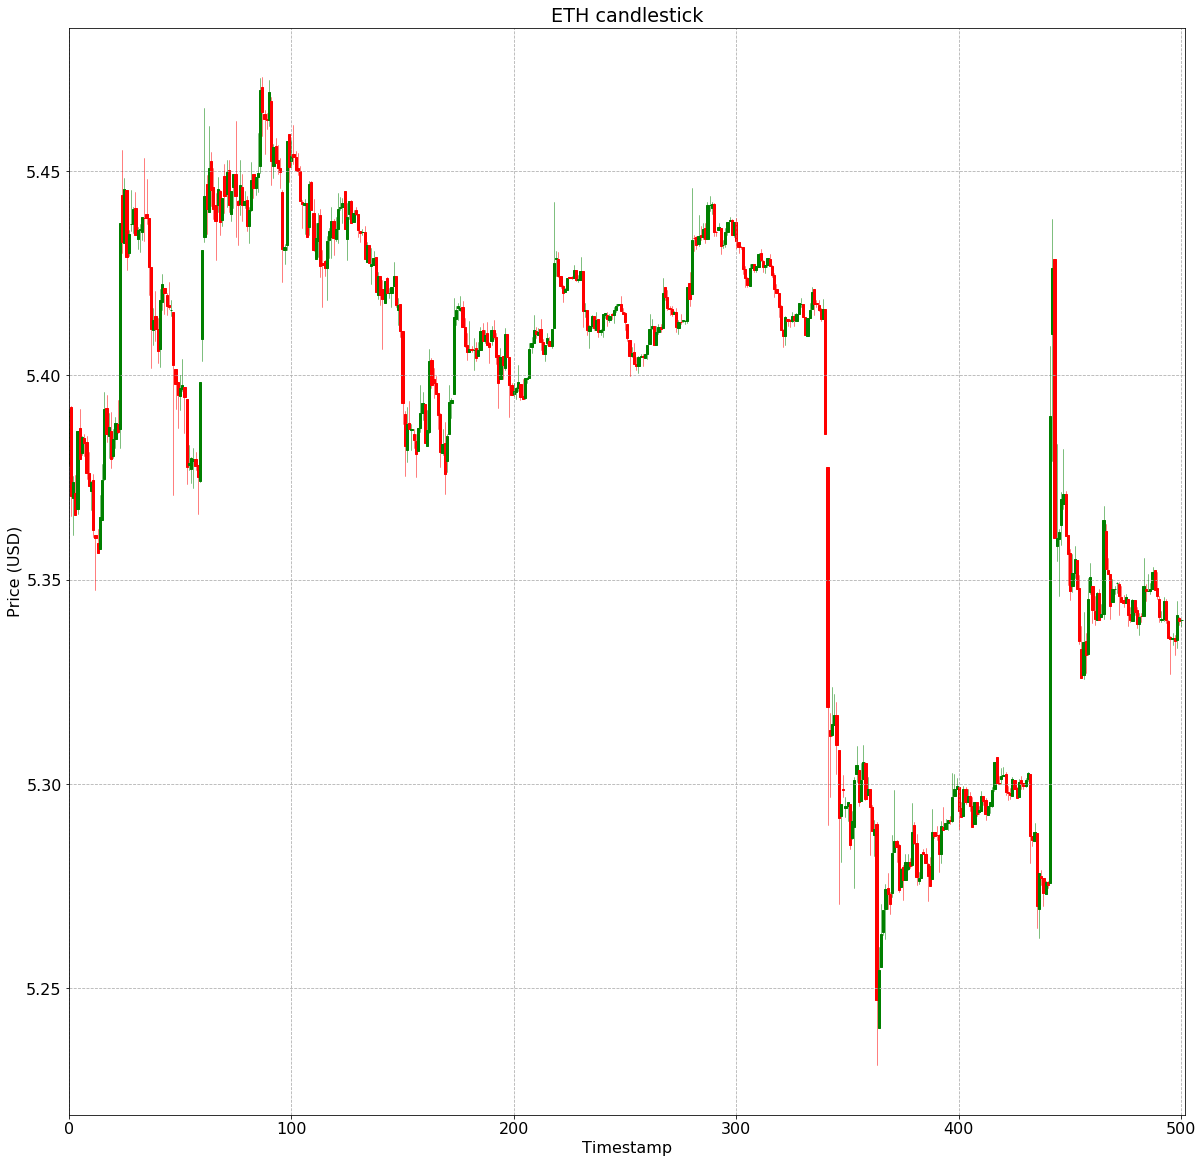

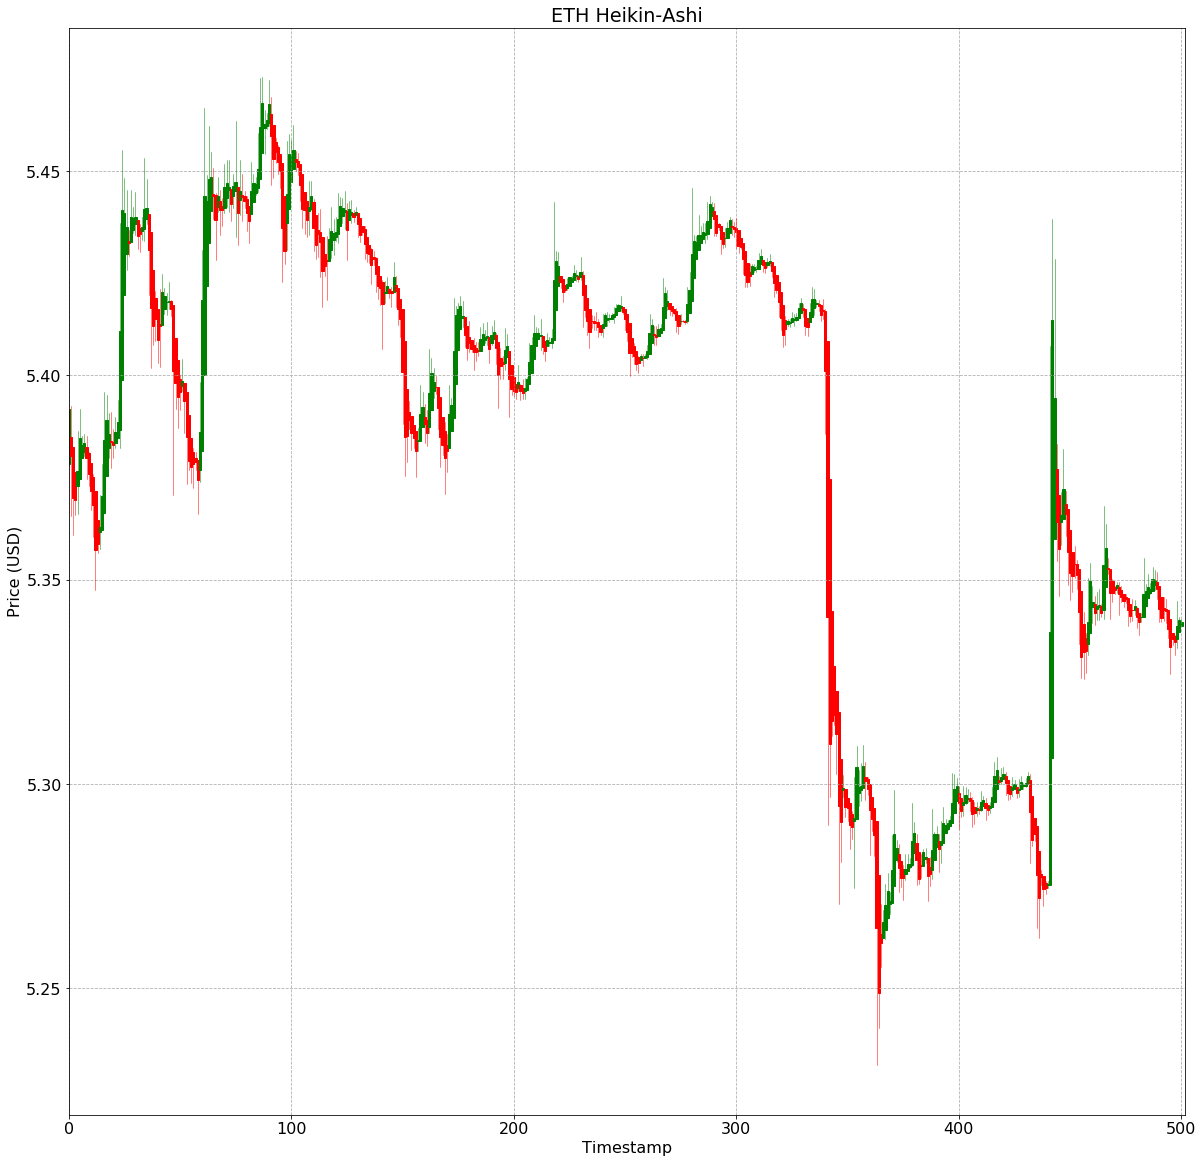

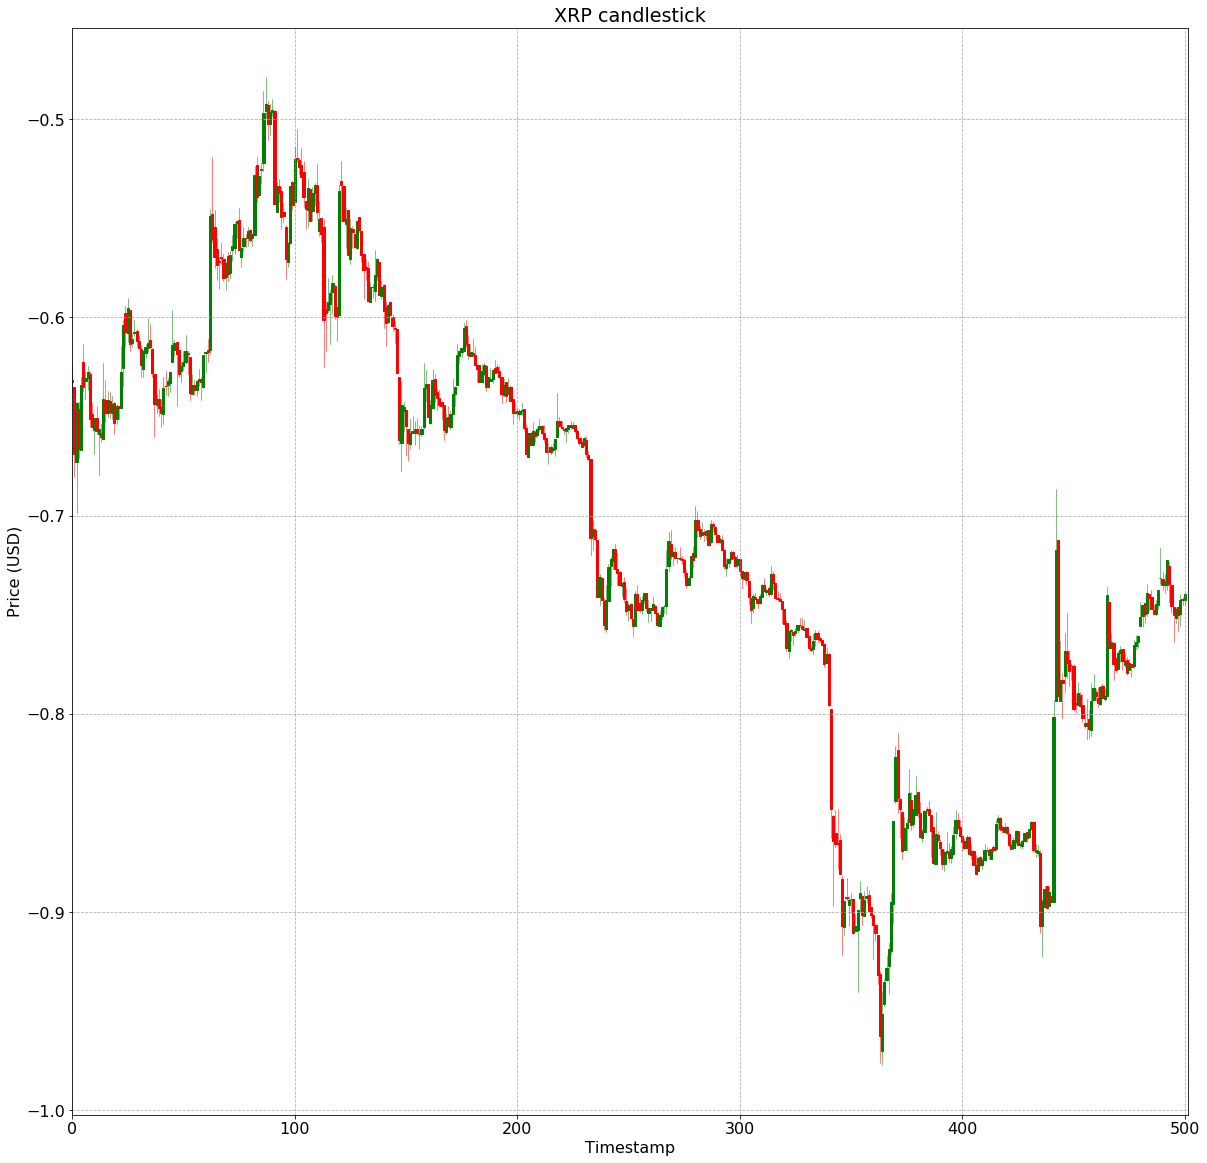

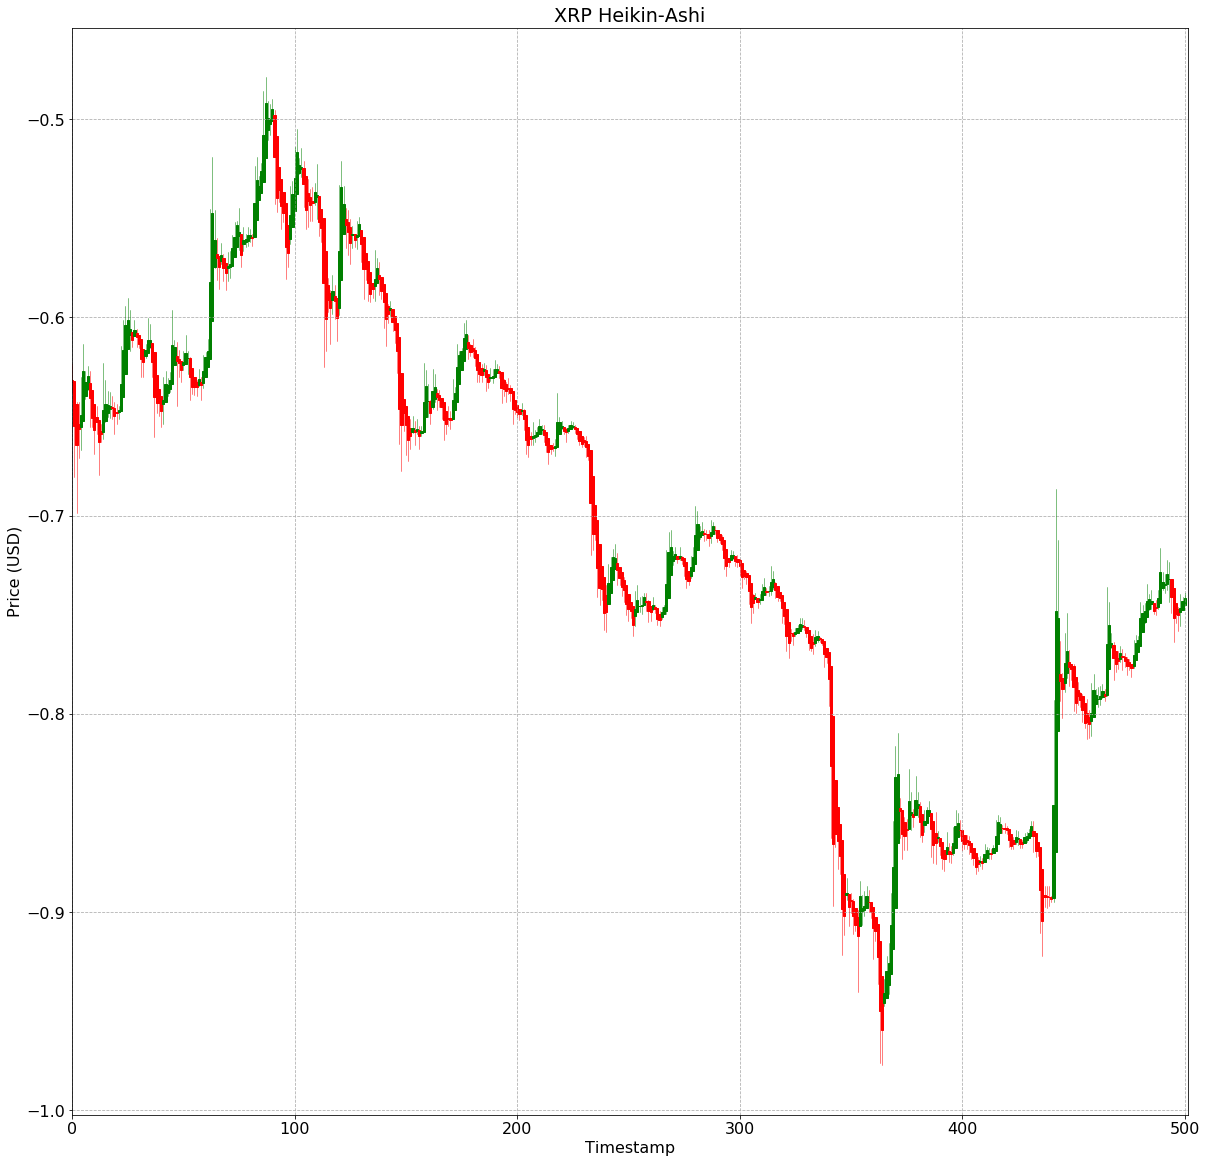

In [13]:
hour_data_log = np.log(hour_data)
minute_data_log = np.log(minute_data)
day_data_log = np.log(day_data)

print("\nDay data:")
display(day_data_log.describe())
print("\nHour data:")
display(hour_data_log.describe())
print("\nMinute data:")
display(minute_data_log.describe())

time_series_minute(minute_data_log, 'BTC')
time_series_minute(minute_data_log, 'ETH')
time_series_minute(minute_data_log, 'XRP')
time_series_hour(hour_data_log, 'BTC')
time_series_hour(hour_data_log, 'ETH')
time_series_hour(hour_data_log, 'XRP')
time_series_day(day_data_log, 'BTC', 2400)
time_series_day(day_data_log, 'ETH', 2400)
time_series_day(day_data_log, 'XRP', 2400)
candles(60, 'BTC', minute_data_log)
candles(60, 'ETH', minute_data_log)
candles(60, 'XRP', minute_data_log)


### Variação dos preços

In [14]:
def get_data_var(dataset):
    dataset_var = dataset.copy()
    for i in range(0,len(dataset)-1):
        dataset_var.iloc[i, dataset_var.columns.get_loc('BTC')] = dataset_var.iloc[i+1, dataset_var.columns.get_loc('BTC')] - dataset_var.iloc[i, dataset_var.columns.get_loc('BTC')]
        dataset_var.iloc[i, dataset_var.columns.get_loc('ETH')] = dataset_var.iloc[i+1, dataset_var.columns.get_loc('ETH')] - dataset_var.iloc[i, dataset_var.columns.get_loc('ETH')]
        dataset_var.iloc[i, dataset_var.columns.get_loc('XRP')] = dataset_var.iloc[i+1, dataset_var.columns.get_loc('XRP')] - dataset_var.iloc[i, dataset_var.columns.get_loc('XRP')]
    dataset_var = dataset_var.drop(dataset_var.index[len(dataset_var)-1])
    return dataset_var

minute_data_var = get_data_var(minute_data)
hour_data_var   = get_data_var(hour_data)
day_data_var    = get_data_var(day_data)



Day data:


,BTC,BTC_time,ETH,ETH_time,XRP,XRP_time
count,2999.000000,2.999000e+03,2999.000000,2.999000e+03,2999.000000,2.999000e+03
mean,2.158834,1.408925e+09,0.072911,1.408925e+09,0.000174,1.408925e+09
std,187.571287,7.481212e+07,14.184630,7.481212e+07,0.029512,7.481212e+07
min,-2349.490000,1.279411e+09,-228.430000,1.279411e+09,-0.510000,1.279411e+09
25%,-2.160000,1.344168e+09,0.000000,1.344168e+09,0.000000,1.344168e+09
50%,0.011000,1.408925e+09,0.000000,1.408925e+09,0.000000,1.408925e+09
75%,4.215000,1.473682e+09,0.000000,1.473682e+09,0.000000,1.473682e+09
max,3100.740000,1.538438e+09,153.130000,1.538438e+09,0.670000,1.538438e+09



Hour data:


,BTC,BTC_time,ETH,ETH_time,XRP,XRP_time
count,9999.000000,9.999000e+03,9999.000000,9.999000e+03,9999.000000,9.999000e+03
mean,0.249459,1.520665e+09,-0.007201,1.520665e+09,0.000036,1.520665e+09
std,113.572816,1.039179e+07,8.826517,1.039179e+07,0.019398,1.039179e+07
min,-1524.490000,1.502669e+09,-117.690000,1.502669e+09,-0.260000,1.502669e+09
25%,-26.360000,1.511667e+09,-2.185000,1.511667e+09,-0.002600,1.511667e+09
50%,0.770000,1.520665e+09,0.050000,1.520665e+09,0.000000,1.520665e+09
75%,28.720000,1.529663e+09,2.390000,1.529663e+09,0.002300,1.529663e+09
max,996.020000,1.538662e+09,123.960000,1.538662e+09,0.400000,1.538662e+09



Minute data:


,BTC,BTC_time,ETH,ETH_time,XRP,XRP_time
count,30087.000000,3.008700e+04,30087.000000,3.008700e+04,30087.000000,3.008700e+04
mean,0.001948,1.538895e+09,-0.000286,1.538895e+09,-0.000002,1.538895e+09
std,3.852273,5.211308e+05,0.215493,5.211308e+05,0.000773,5.211308e+05
min,-96.920000,1.537992e+09,-5.310000,1.537992e+09,-0.015100,1.537992e+09
25%,-0.660000,1.538443e+09,-0.040000,1.538443e+09,-0.000200,1.538443e+09
50%,0.000000,1.538895e+09,0.000000,1.538895e+09,0.000000,1.538895e+09
75%,0.640000,1.539346e+09,0.030000,1.539346e+09,0.000200,1.539346e+09
max,195.620000,1.539797e+09,4.510000,1.539797e+09,0.013300,1.539797e+09


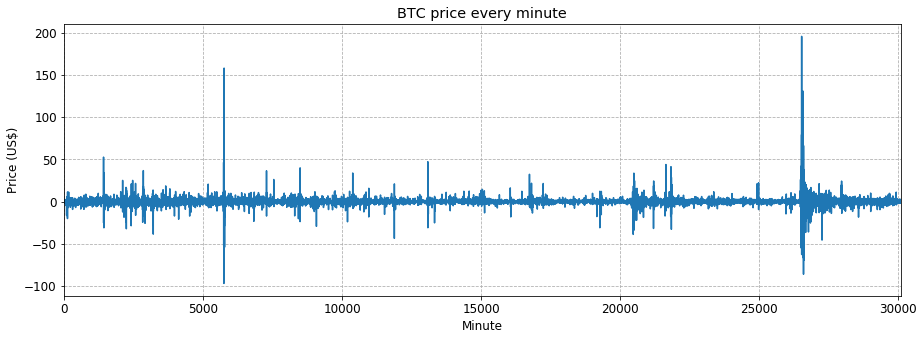

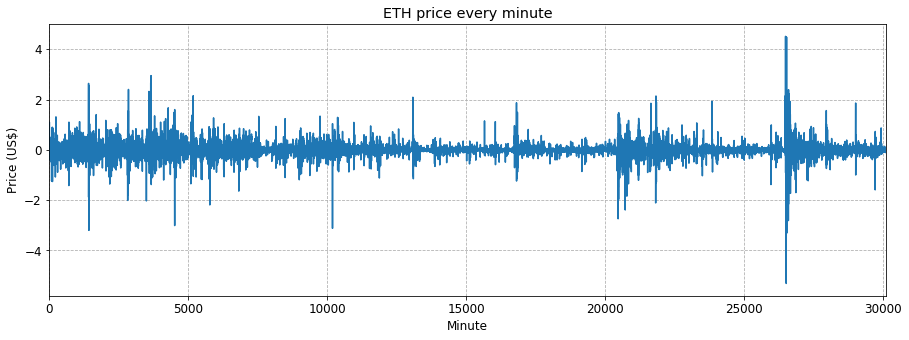

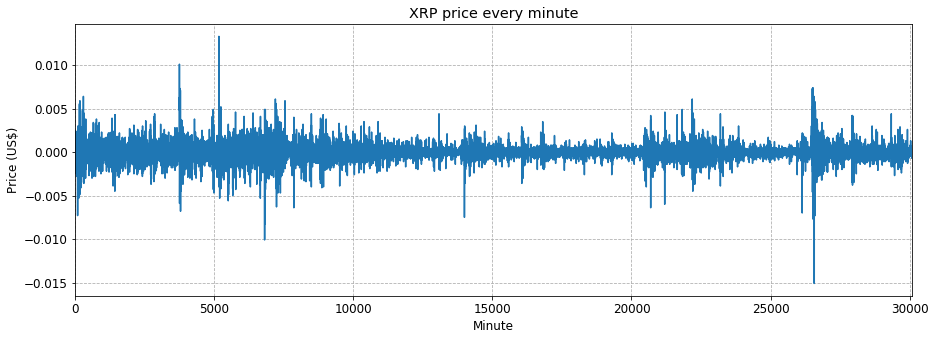

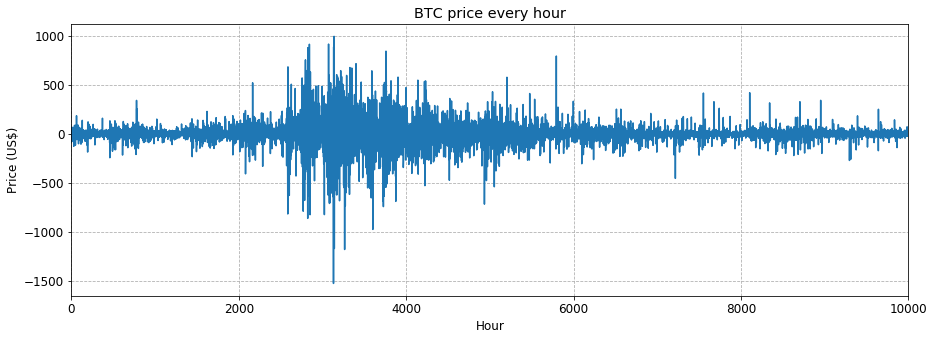

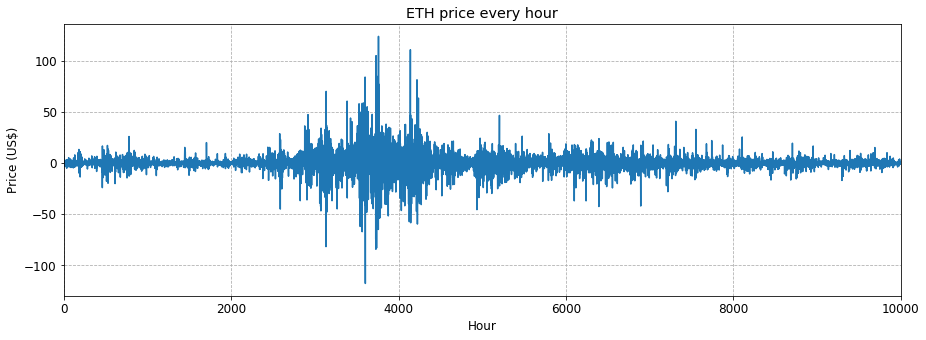

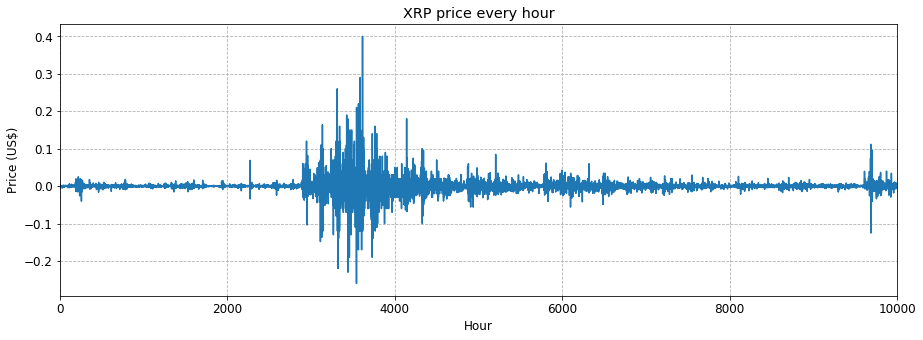

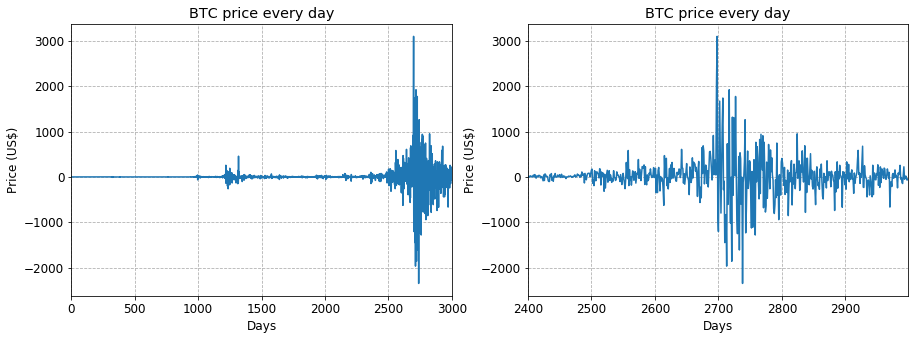

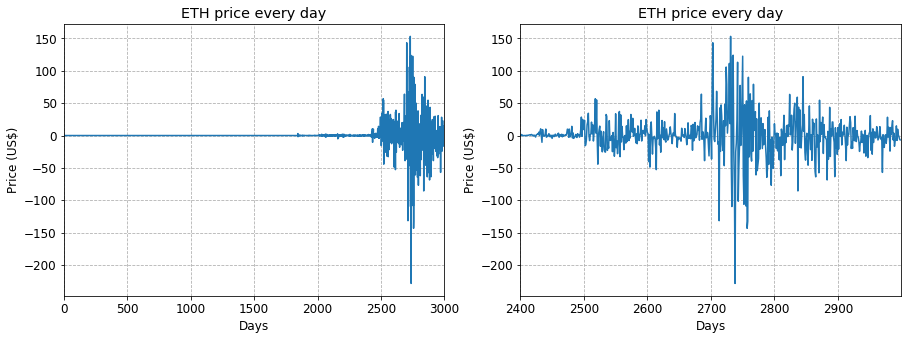

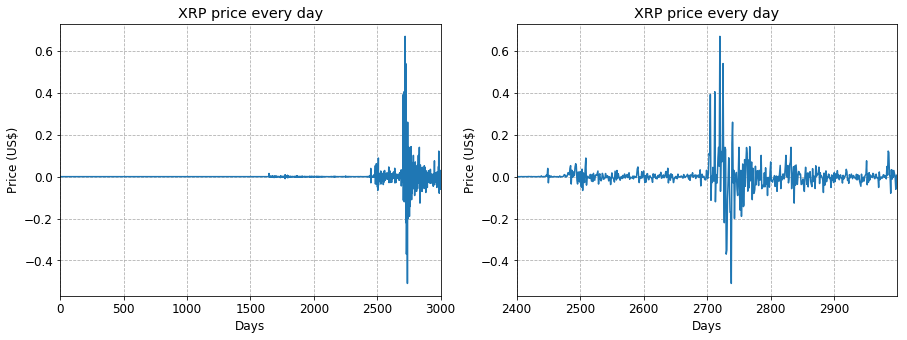

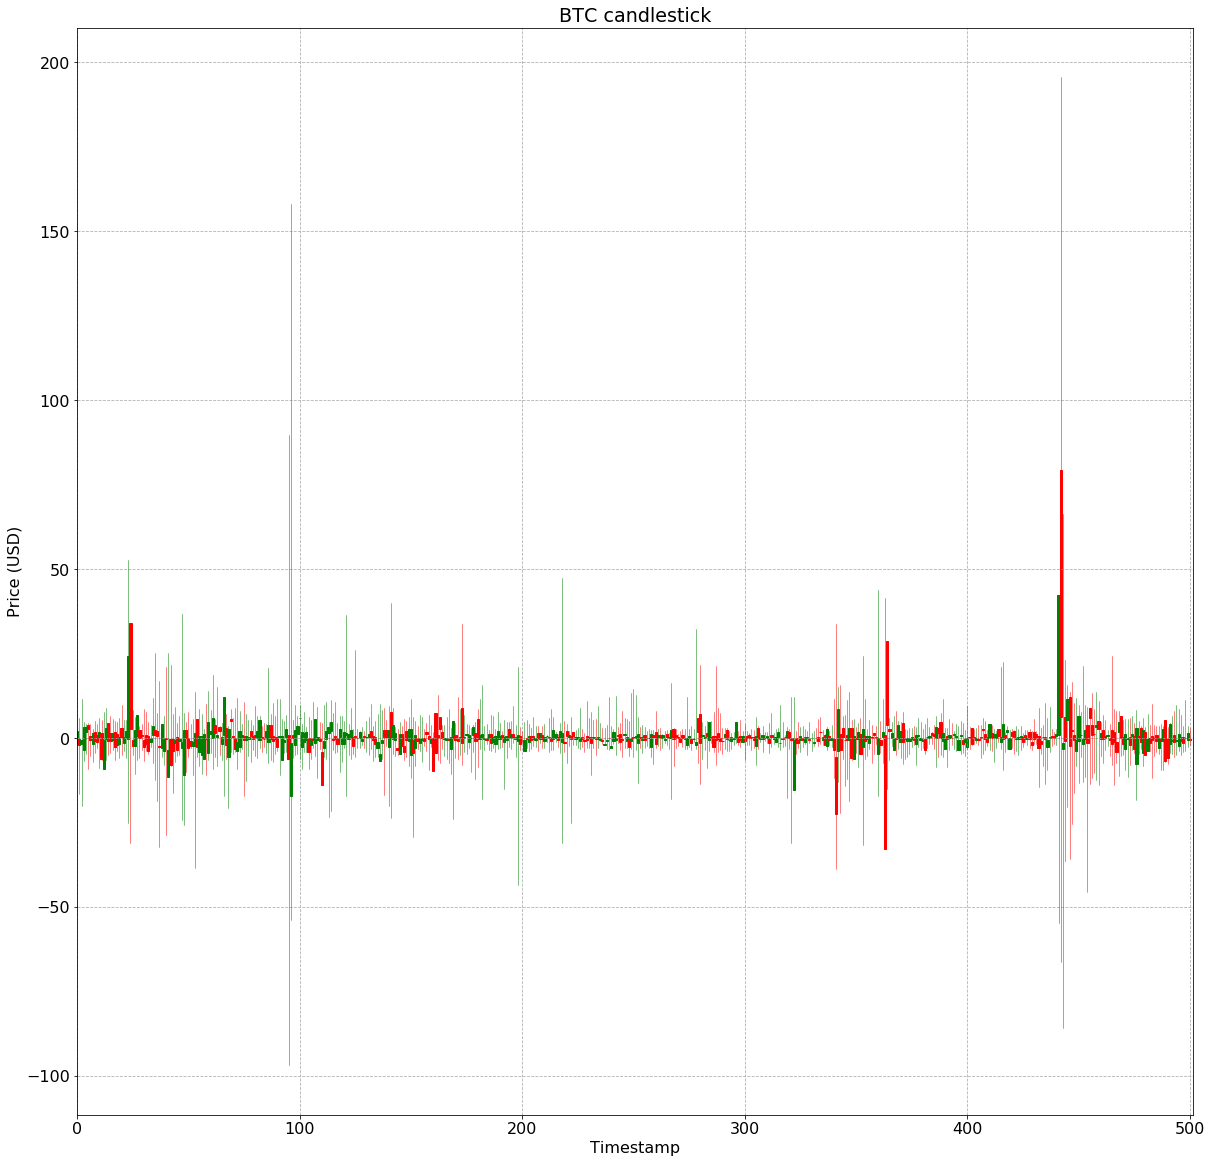

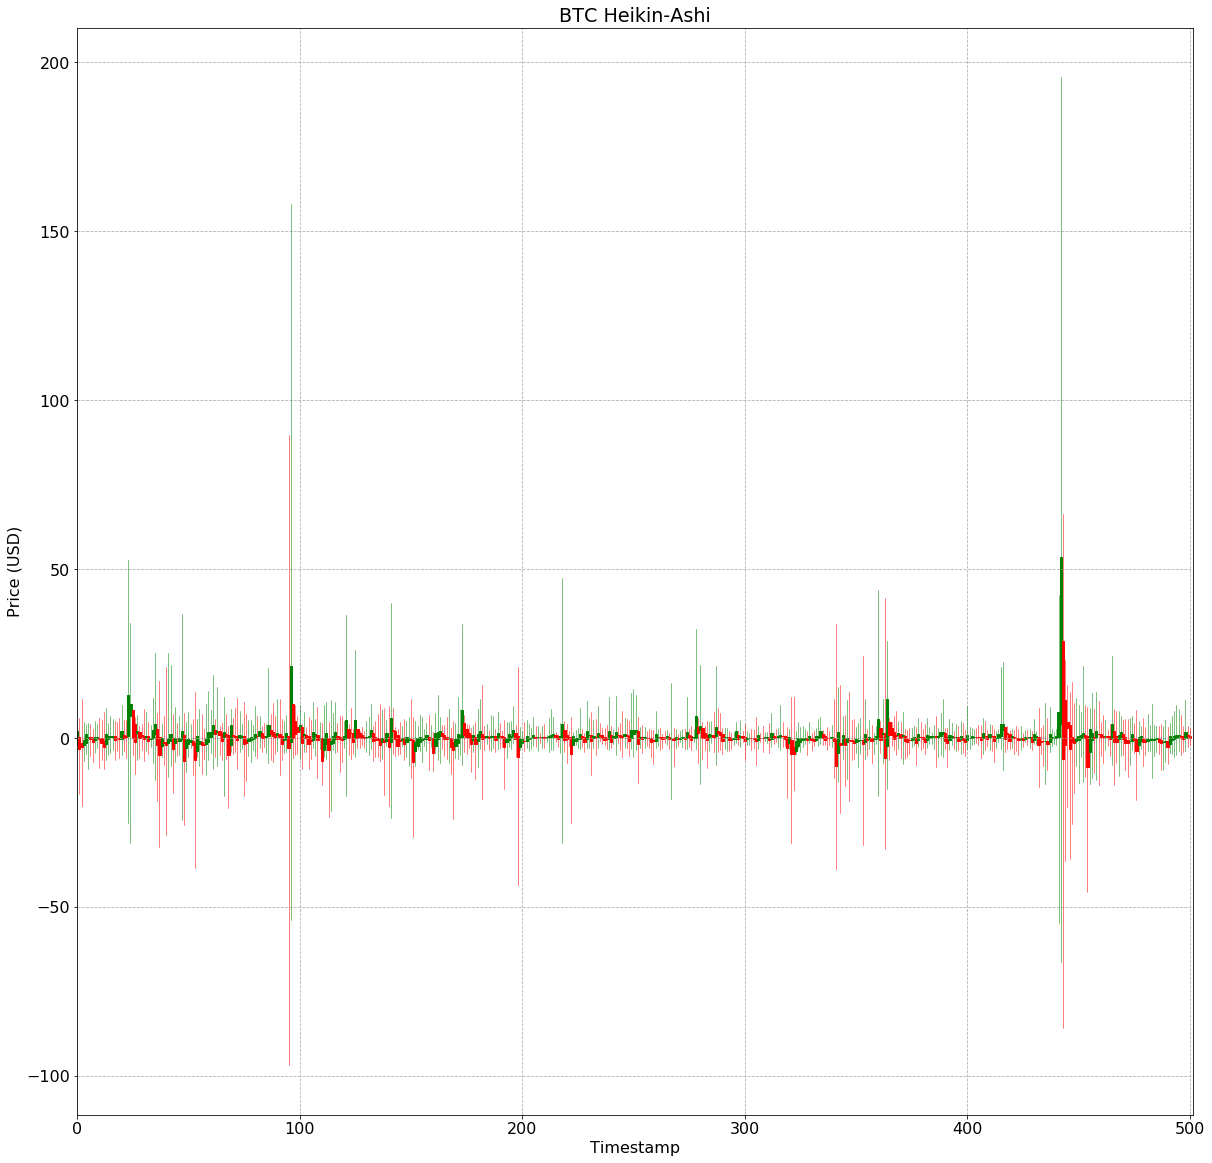

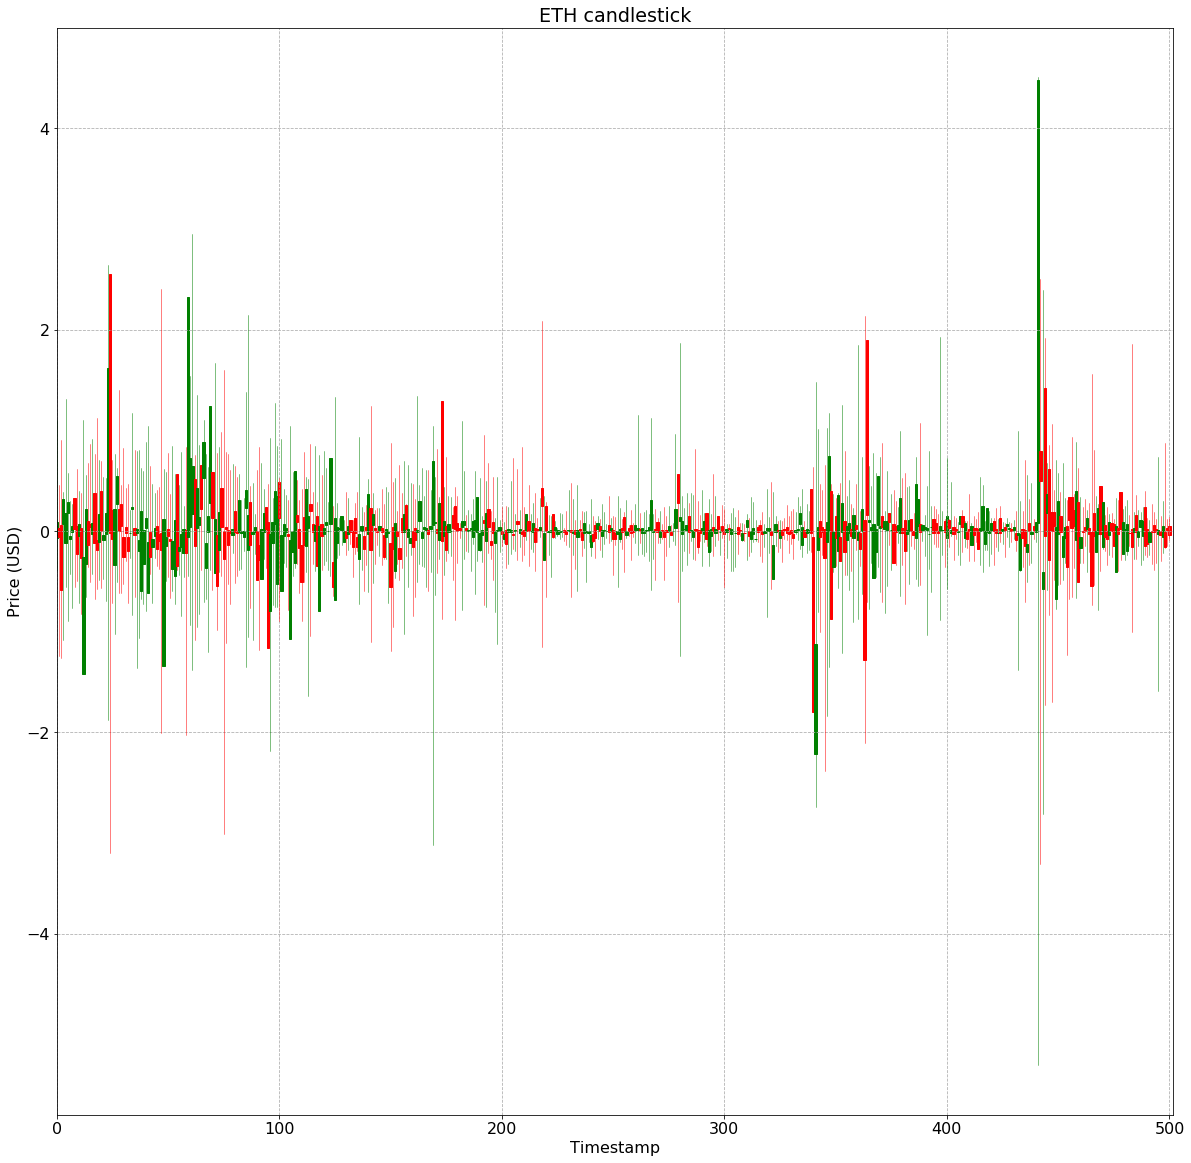

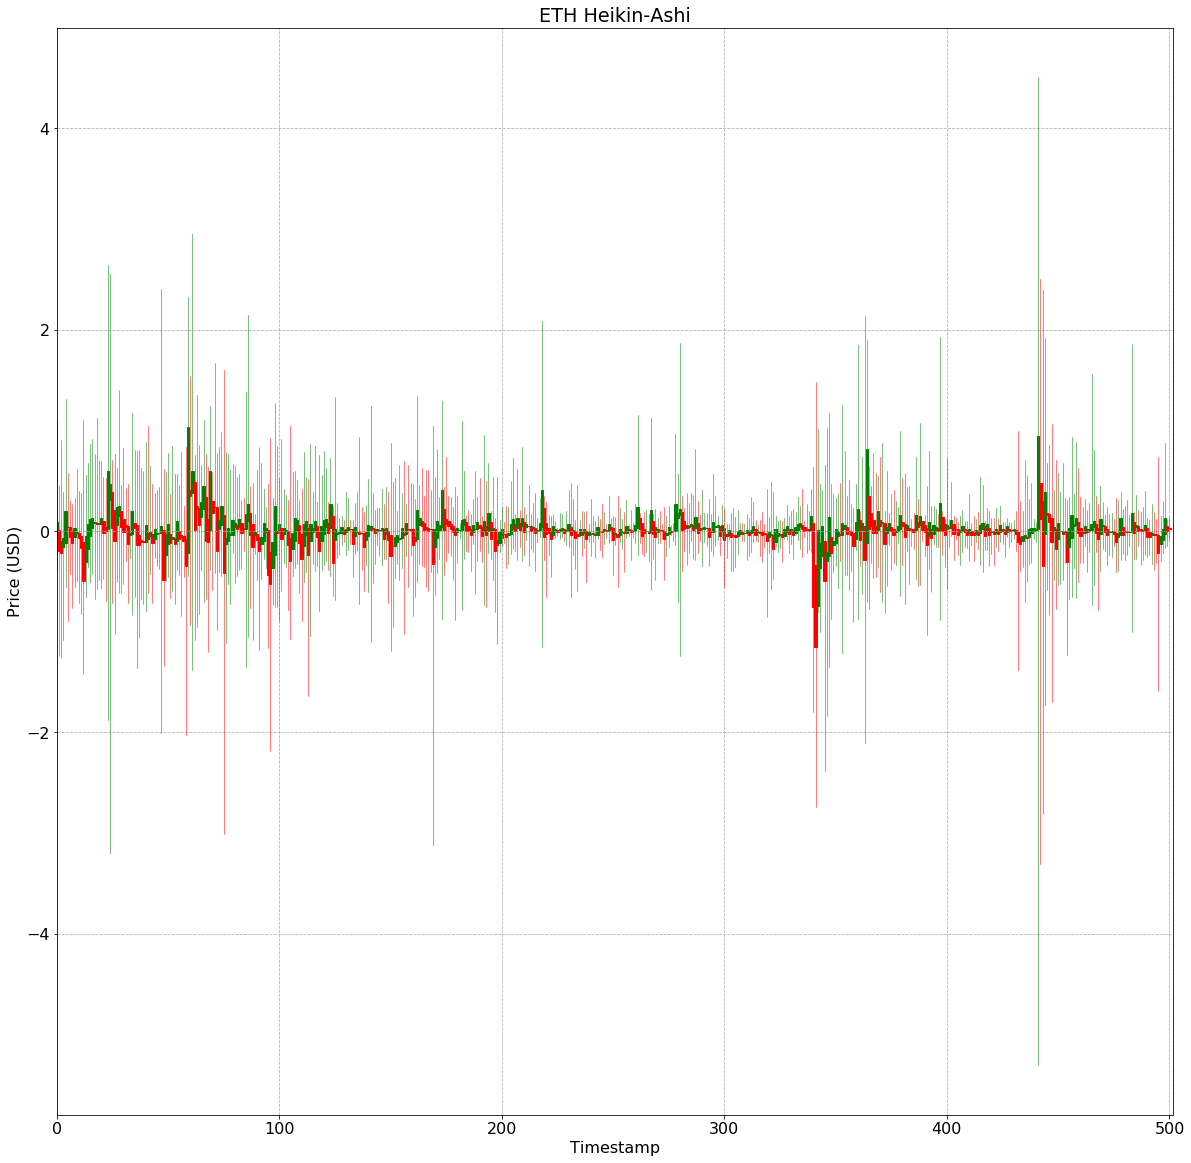

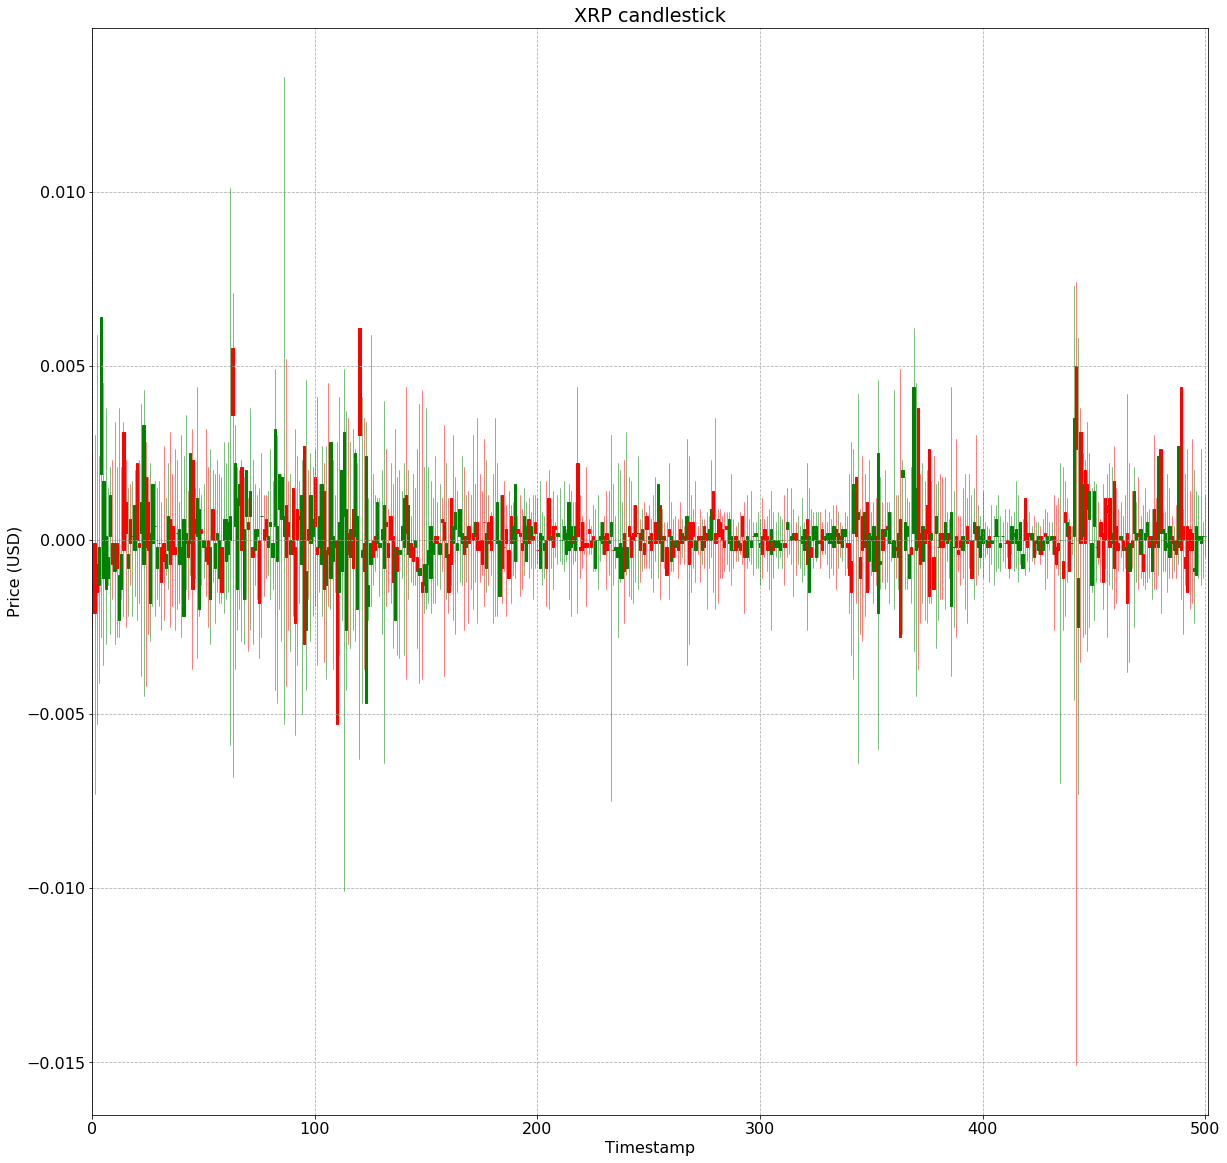

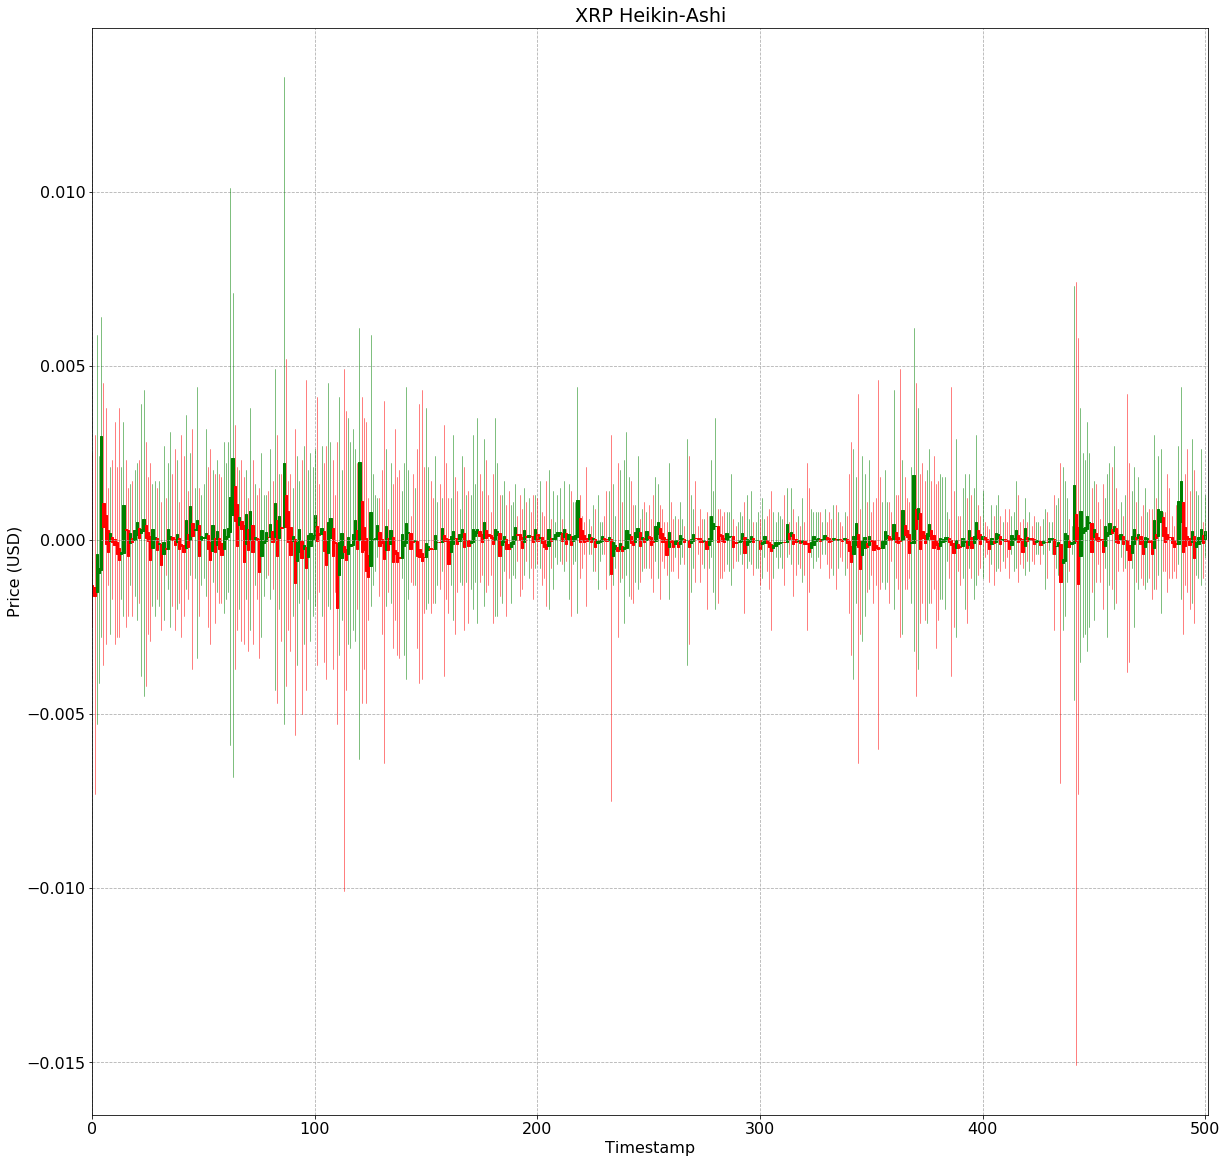

In [15]:
print("\nDay data:")
display(day_data_var.describe())
print("\nHour data:")
display(hour_data_var.describe())
print("\nMinute data:")
display(minute_data_var.describe())

time_series_minute(minute_data_var, 'BTC')
time_series_minute(minute_data_var, 'ETH')
time_series_minute(minute_data_var, 'XRP')
time_series_hour(hour_data_var, 'BTC')
time_series_hour(hour_data_var, 'ETH')
time_series_hour(hour_data_var, 'XRP')
time_series_day(day_data_var, 'BTC', 2400)
time_series_day(day_data_var, 'ETH', 2400)
time_series_day(day_data_var, 'XRP', 2400)
candles(60, 'BTC', minute_data_var)
candles(60, 'ETH', minute_data_var)
candles(60, 'XRP', minute_data_var)